<a href="https://colab.research.google.com/github/irisroatis/fifaranking20182021/blob/main/Comparison_all_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# example making new class predictions for a classification problem
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import  LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import seaborn as sns
import tensorflow as tf
from keras.layers import Input
from keras.models import Model
from keras.initializers import RandomUniform, Constant
import keras
from keras.callbacks import EarlyStopping


import warnings
warnings.filterwarnings('ignore')


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def dataset_to_Xandy(dataset, target_variable, only_X = True):
    X = dataset.loc[:, dataset.columns != target_variable]
    y = dataset.loc[:, dataset.columns == target_variable]

    if only_X:
        return X
    else:
        return X, y

In [ ]:
total_epochs = 300
early_stopping_bool = True

In [ ]:

which_dataset = 'Dresses Sales'
df_all = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dresses.csv')


target_variable = 'Class'
continuous_variables = ['V4']
binary_variables = []
categorical_variables=   list(set(df_all.keys()) - set(continuous_variables + [target_variable] + binary_variables))

have_cont = False
df_all[target_variable] = df_all[target_variable].replace([1, 2], [1, 0])


for col in df_all.keys():
  print(df_all[col].value_counts())

V2
Casual      232
Sexy         69
party        51
cute         45
vintage      25
bohemian     24
Brief        18
work         17
Novelty       8
sexy          7
Flare         2
OL            1
fashion       1
Name: count, dtype: int64
V3
Average      252
Low          129
low           45
Medium        30
very-high     21
high          15
High           6
?              2
Name: count, dtype: int64
V4
0.0    120
4.7     84
4.8     57
5.0     55
4.6     54
4.5     34
4.4     27
4.9     25
4.3     20
4.0      7
4.2      6
4.1      5
3.7      2
3.6      1
3.5      1
1.0      1
3.0      1
Name: count, dtype: int64
V5
M        177
free     173
L         96
S         37
XL        15
small      1
s          1
Name: count, dtype: int64
V6
Summer    159
Spring    122
Winter     99
Automn     61
winter     46
Autumn      8
spring      2
?           2
summer      1
Name: count, dtype: int64
V7
o-neck             271
v-neck             124
slash-neck          25
boat-neck           19
Sweetheart  

In [ ]:
df_all

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,Class
0,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,?,chiffon,ruffles,animal,0
1,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,?,ruffles,animal,1
2,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,?,?,print,1
3,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,0
4,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Casual,Low,4.7,M,Spring,o-neck,full,natural,polyster,?,?,solid,0
496,Sexy,Low,4.3,free,Summer,o-neck,full,empire,cotton,?,?,?,1
497,Casual,Average,4.7,M,Summer,v-neck,full,empire,cotton,?,lace,solid,0
498,Casual,Average,4.6,L,winter,boat-neck,sleevless,empire,silk,broadcloth,applique,print,0


In [ ]:

# which_dataset = 'Bank Loan'
# df_all = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Bank_Loan_Granting.csv')
# df_all.drop(columns=['ID'], inplace = True)
# df_all.dropna(inplace=True)
# df_all.reset_index(drop=True, inplace=True)

# target_variable = 'Personal Loan'
# categorical_variables = ['ZIP Code','Family','CCAvg','Education']
# binary_variables = ['Securities Account','CD Account','CreditCard','Online']
# continuous_variables =   list(set(df_all.keys()) - set(categorical_variables + [target_variable] + binary_variables))

# have_cont = False



# for col in df_all.keys():
#   print(df_all[col].value_counts())

In [ ]:
# which_dataset = 'Stroke'

# df_all = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataset_stroke.csv')
# df_all.drop(columns=['id'], inplace = True)
# df_all.dropna(inplace=True)
# df_all = df_all.drop(df_all[df_all['age'] == '*82'].index)
# df_all.reset_index(drop=True, inplace=True)

# target_variable = 'stroke'
# categorical_variables = ['gender','work_type','smoking_status']
# binary_variables = ['hypertension','heart_disease','ever_married','Residence_type']
# continuous_variables =   list(set(df_all.keys()) - set(categorical_variables + [target_variable] + binary_variables))

# have_cont = False
# df_all[binary_variables] = df_all[binary_variables].replace(['Yes', 'No','Urban','Rural'], [1, 0, 1, 0])



# for col in df_all.keys():
#   print(df_all[col].value_counts())

In [ ]:
# which_dataset = 'Simulated data with 2 cols and 2 continuous - NO CORRELATION'
# df_all = pd.read_csv('/content/drive/My Drive/Colab Notebooks/df_2categorical_nocorrelation.csv')
# have_cont = True
# df_all_continuous = pd.read_csv('/content/drive/My Drive/Colab Notebooks/df_2categorical_nocorrelation_continuous.csv')


# target_variable = 'target'
# categorical_variables = ['Feature_1','Feature_2']
# binary_variables = []
# continuous_variables =   list(set(df_all.keys()) - set(categorical_variables + [target_variable] + binary_variables))


# for col in df_all.keys():
#   print(df_all[col].value_counts())

In [ ]:
# which_dataset = 'Simulated data with 2 cols and 2 continuous - CORRELATION'
# df_all = pd.read_csv('/content/drive/My Drive/Colab Notebooks/df_2categorical_correlation.csv')

# have_cont = True
# df_all_continuous = pd.read_csv('/content/drive/My Drive/Colab Notebooks/df_2categorical_correlation_continuous.csv')

# target_variable = 'target'
# categorical_variables = ['Feature_1','Feature_2']
# binary_variables = []
# continuous_variables =   list(set(df_all.keys()) - set(categorical_variables + [target_variable] + binary_variables))


# for col in df_all.keys():
#   print(df_all[col].value_counts())

In [ ]:
# which_dataset = 'Simulated data with 2 cols and 2 continuous (normal -> class 0 + uniform -> class 1)'
# df_all = pd.read_csv('/content/drive/My Drive/Colab Notebooks/df_2categorical_norandunif.csv')

# have_cont = True
# df_all_continuous = pd.read_csv('/content/drive/My Drive/Colab Notebooks/df_2categorical_norandunif_continuous.csv')

# target_variable = 'target'
# categorical_variables = ['Feature_1','Feature_2']
# binary_variables = []
# continuous_variables =   list(set(df_all.keys()) - set(categorical_variables + [target_variable] + binary_variables))


# for col in df_all.keys():
#   print(df_all[col].value_counts())

In [ ]:
# which_dataset = 'Simulated data with 2 cols and 2 continuous (beta -> class 0 + uniform -> class 1)'
# df_all = pd.read_csv('/content/drive/My Drive/Colab Notebooks/df_2categorical_betaandunif.csv')

# have_cont = True
# df_all_continuous = pd.read_csv('/content/drive/My Drive/Colab Notebooks/df_2categorical_betaandunif_continuous.csv')

# target_variable = 'target'
# categorical_variables = ['Feature_1','Feature_2']
# binary_variables = []
# continuous_variables =   list(set(df_all.keys()) - set(categorical_variables + [target_variable] + binary_variables))


# for col in df_all.keys():
#   print(df_all[col].value_counts())

In [ ]:
# which_dataset = 'Simulated data with 2 cols merged into one categorical and 2 continuous'
# df_all = pd.read_csv('/content/drive/My Drive/Colab Notebooks/df_multiv.csv')

# have_cont = True
# df_all_continuous = pd.read_csv('/content/drive/My Drive/Colab Notebooks/df_multiv_continuous.csv')

# target_variable = 'target'
# categorical_variables = ['Category']
# binary_variables = []
# continuous_variables =   list(set(df_all.keys()) - set(categorical_variables + [target_variable] + binary_variables))


# for col in df_all.keys():
#   print(df_all[col].value_counts())

In [ ]:
def split_train_test(df, target_variable, indices_test = False):

    how_many_0s = len(df[df[target_variable] == 0])
    how_many_1s = len(df[df[target_variable] == 1])
    size = how_many_0s + how_many_1s

    randomlist = random.sample(list(df[df[target_variable]==0].index.values), 1 * how_many_0s // 4) + random.sample(list(df[df[target_variable]==1].index.values), 1 * how_many_1s // 4)

    not_in_randomlist = list(set(range(0,size)) - set(randomlist))

    df_test = df.iloc[not_in_randomlist,:]
    df_train = df.iloc[randomlist,:]
    df_train.sort_index(inplace=True)

    df_train.reset_index(inplace=True, drop = True)
    df_test.reset_index(inplace=True, drop = True)



    if indices_test:
        return df_train, df_test, randomlist, not_in_randomlist
    else:
        return df_train, df_test


dictionary_all_categorical_columns_positives = {}
dictionary_all_categorical_columns_negatives = {}


df_train, df_test, randomlist, not_in_randomlist =   split_train_test(df_all, target_variable, indices_test = True)
if have_cont:
  df_train_with_cont = df_all_continuous.iloc[randomlist,:]
  df_test_with_cont =  df_all_continuous.iloc[not_in_randomlist,:]
  df_train_with_cont.reset_index(inplace=True, drop = True)
  df_test_with_cont.reset_index(inplace=True, drop = True)

In [ ]:
list_columns = []

for which_column_to_categories in categorical_variables:
  categories = df_all[which_column_to_categories].unique().tolist()

  dict_whichcolumn_pos = {}
  dict_whichcolumn_neg = {}

  all_p = df_all[df_all[target_variable] == 1].shape[0]
  all_n = df_all[df_all[target_variable] == 0].shape[0]


  for cat in categories:
      which_cat = df_train[df_train[which_column_to_categories] == cat]
      if which_cat.shape[0] >= 1:
          dict_whichcolumn_pos[cat] = which_cat[which_cat[target_variable] == 1].shape[0]
          dict_whichcolumn_neg[cat] = which_cat[which_cat[target_variable] == 0].shape[0]
      else:
          dict_whichcolumn_pos[cat] = all_p
          dict_whichcolumn_neg[cat] = all_n
  dictionary_all_categorical_columns_positives[which_column_to_categories] = dict_whichcolumn_pos
  dictionary_all_categorical_columns_negatives[which_column_to_categories] = dict_whichcolumn_neg


  list_columns.append(which_column_to_categories+str('_P'))


In [ ]:
X_train, y_train =  dataset_to_Xandy(df_train, target_variable, only_X = False) ###### the original dataset
X_test, y_test =  dataset_to_Xandy(df_test, target_variable, only_X = False) ###### the original dataset

In [ ]:
X_train_mod_1 = X_train.copy()
X_test_mod_1 = X_test.copy()
list_datasets = {}



for which_column_to_categories in categorical_variables:


  X_train_mod_1[which_column_to_categories+str('_N')] = X_train_mod_1[which_column_to_categories].copy()
  X_train_mod_1.rename(columns={which_column_to_categories: which_column_to_categories+str('_P')}, inplace=True)

  X_test_mod_1[which_column_to_categories+str('_N')] = X_test_mod_1[which_column_to_categories].copy()
  X_test_mod_1.rename(columns={which_column_to_categories: which_column_to_categories+str('_P')}, inplace=True)

  dic_pos = dictionary_all_categorical_columns_positives[which_column_to_categories]
  dic_neg = dictionary_all_categorical_columns_negatives[which_column_to_categories]


  test_this_column = pd.DataFrame(columns=['cat','pos','neg','tar'])

  for cat in dic_pos.keys():

    n = dic_neg[cat]
    p = dic_pos[cat]

    X_train_mod_1[which_column_to_categories+str('_N')].replace(cat, n, inplace = True)
    X_train_mod_1[which_column_to_categories+str('_P')].replace(cat, p, inplace = True)
    X_test_mod_1[which_column_to_categories+str('_N')].replace(cat, n, inplace = True)
    X_test_mod_1[which_column_to_categories+str('_P')].replace(cat, p, inplace = True)

    test_this_column = test_this_column._append({'cat':cat,'pos': p, 'neg': n, 'tar':p/(p+n)},ignore_index=True)

  list_datasets[which_column_to_categories] = test_this_column
  list_columns.append(which_column_to_categories+str('_N'))

X_train_mod_1

,V2_P,V3_P,V4,V5_P,V6_P,V7_P,V8_P,V9_P,V10_P,V11_P,...,V5_N,V6_N,V12_N,V9_N,V11_N,V7_N,V8_N,V10_N,V13_N,V2_N
0,33,19,0.0,8,29,38,1,50,2,38,...,8,17,1,30,27,25,0,0,3,19
1,5,34,4.6,8,9,38,12,50,1,18,...,8,15,2,30,14,25,14,3,8,1
2,0,34,0.0,29,9,16,15,12,28,8,...,21,15,2,13,3,14,11,17,17,1
3,6,34,5.0,29,29,38,12,50,17,8,...,21,17,9,30,3,25,14,4,17,6
4,4,34,4.8,24,29,38,15,12,28,0,...,19,17,25,13,2,25,11,17,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,5,34,4.7,24,9,38,12,50,2,18,...,19,15,2,30,14,25,14,3,17,8
120,10,34,0.0,29,2,2,30,50,28,8,...,21,5,2,30,3,5,22,17,17,7
121,33,34,5.0,8,29,38,30,50,28,38,...,8,17,25,30,27,25,22,17,13,19
122,2,19,4.6,29,29,38,30,50,28,18,...,21,17,1,30,14,25,22,17,17,5


In [ ]:
list_columns = list_columns+continuous_variables+binary_variables
list_columns

['V3_P',
 'V5_P',
 'V6_P',
 'V12_P',
 'V9_P',
 'V11_P',
 'V7_P',
 'V8_P',
 'V10_P',
 'V13_P',
 'V2_P',
 'V3_N',
 'V5_N',
 'V6_N',
 'V12_N',
 'V9_N',
 'V11_N',
 'V7_N',
 'V8_N',
 'V10_N',
 'V13_N',
 'V2_N',
 'V4']

In [ ]:
X_train_mod_1 = X_train_mod_1[list_columns]
X_test_mod_1 = X_test_mod_1[list_columns]

X_train_mod_1

,V3_P,V5_P,V6_P,V12_P,V9_P,V11_P,V7_P,V8_P,V10_P,V13_P,...,V6_N,V12_N,V9_N,V11_N,V7_N,V8_N,V10_N,V13_N,V2_N,V4
0,19,8,29,5,50,38,38,1,2,3,...,17,1,30,27,25,0,0,3,19,0.0
1,34,8,9,1,50,18,38,12,1,8,...,15,2,30,14,25,14,3,8,1,4.6
2,34,29,9,1,12,8,16,15,28,30,...,15,2,13,3,14,11,17,17,1,0.0
3,34,29,29,7,50,8,38,12,17,30,...,17,9,30,3,25,14,4,17,6,5.0
4,34,24,29,33,12,0,38,15,28,3,...,17,25,13,2,25,11,17,3,4,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,34,24,9,1,50,18,38,12,2,30,...,15,2,30,14,25,14,3,17,8,4.7
120,34,29,2,0,50,8,2,30,28,30,...,5,2,30,3,5,22,17,17,7,0.0
121,34,8,29,33,50,38,38,30,28,14,...,17,25,30,27,25,22,17,13,19,5.0
122,19,29,29,1,50,18,38,30,28,30,...,17,1,30,14,25,22,17,17,5,4.6


In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train_mod_1.values.astype(np.float32), y_train.values))
test_ds = tf.data.Dataset.from_tensor_slices((X_test_mod_1.values.astype(np.float32),  y_test.values))


In [ ]:
for e in train_ds.take(3):
  print(e)

(<tf.Tensor: shape=(23,), dtype=float32, numpy=
array([19.,  8., 29.,  5., 50., 38., 38.,  1.,  2.,  3., 33., 14.,  8.,
       17.,  1., 30., 27., 25.,  0.,  0.,  3., 19.,  0.], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=int64, numpy=array([1])>)
(<tf.Tensor: shape=(23,), dtype=float32, numpy=
array([34. ,  8. ,  9. ,  1. , 50. , 18. , 38. , 12. ,  1. ,  8. ,  5. ,
       26. ,  8. , 15. ,  2. , 30. , 14. , 25. , 14. ,  3. ,  8. ,  1. ,
        4.6], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=int64, numpy=array([0])>)
(<tf.Tensor: shape=(23,), dtype=float32, numpy=
array([34., 29.,  9.,  1., 12.,  8., 16., 15., 28., 30.,  0., 26., 21.,
       15.,  2., 13.,  3., 14., 11., 17., 17.,  1.,  0.], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=int64, numpy=array([0])>)


In [ ]:
from functools import partial

def split_inputs(x, y, categorical_variables):
  how_many_cat_variables = len(categorical_variables)
  dictionary = {}
  for index in range(how_many_cat_variables):
    dictionary[categorical_variables[index]] = tf.cast([x[index], x[how_many_cat_variables+index]], dtype = 'int32')
  dictionary['rest'] = x[2*how_many_cat_variables:]
  return (dictionary, y)

f = partial(split_inputs, categorical_variables=categorical_variables)
train_ds = train_ds.map(f)
train_ds

<_MapDataset element_spec=({'V3': TensorSpec(shape=(2,), dtype=tf.int32, name=None), 'V5': TensorSpec(shape=(2,), dtype=tf.int32, name=None), 'V6': TensorSpec(shape=(2,), dtype=tf.int32, name=None), 'V12': TensorSpec(shape=(2,), dtype=tf.int32, name=None), 'V9': TensorSpec(shape=(2,), dtype=tf.int32, name=None), 'V11': TensorSpec(shape=(2,), dtype=tf.int32, name=None), 'V7': TensorSpec(shape=(2,), dtype=tf.int32, name=None), 'V8': TensorSpec(shape=(2,), dtype=tf.int32, name=None), 'V10': TensorSpec(shape=(2,), dtype=tf.int32, name=None), 'V13': TensorSpec(shape=(2,), dtype=tf.int32, name=None), 'V2': TensorSpec(shape=(2,), dtype=tf.int32, name=None), 'rest': TensorSpec(shape=(1,), dtype=tf.float32, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
test_ds = test_ds.map(f)
test_ds

<_MapDataset element_spec=({'V3': TensorSpec(shape=(2,), dtype=tf.int32, name=None), 'V5': TensorSpec(shape=(2,), dtype=tf.int32, name=None), 'V6': TensorSpec(shape=(2,), dtype=tf.int32, name=None), 'V12': TensorSpec(shape=(2,), dtype=tf.int32, name=None), 'V9': TensorSpec(shape=(2,), dtype=tf.int32, name=None), 'V11': TensorSpec(shape=(2,), dtype=tf.int32, name=None), 'V7': TensorSpec(shape=(2,), dtype=tf.int32, name=None), 'V8': TensorSpec(shape=(2,), dtype=tf.int32, name=None), 'V10': TensorSpec(shape=(2,), dtype=tf.int32, name=None), 'V13': TensorSpec(shape=(2,), dtype=tf.int32, name=None), 'V2': TensorSpec(shape=(2,), dtype=tf.int32, name=None), 'rest': TensorSpec(shape=(1,), dtype=tf.float32, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
for e in train_ds.take(3):
  print(e)


({'V3': <tf.Tensor: shape=(2,), dtype=int32, numpy=array([19, 14], dtype=int32)>, 'V5': <tf.Tensor: shape=(2,), dtype=int32, numpy=array([8, 8], dtype=int32)>, 'V6': <tf.Tensor: shape=(2,), dtype=int32, numpy=array([29, 17], dtype=int32)>, 'V12': <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5, 1], dtype=int32)>, 'V9': <tf.Tensor: shape=(2,), dtype=int32, numpy=array([50, 30], dtype=int32)>, 'V11': <tf.Tensor: shape=(2,), dtype=int32, numpy=array([38, 27], dtype=int32)>, 'V7': <tf.Tensor: shape=(2,), dtype=int32, numpy=array([38, 25], dtype=int32)>, 'V8': <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 0], dtype=int32)>, 'V10': <tf.Tensor: shape=(2,), dtype=int32, numpy=array([2, 0], dtype=int32)>, 'V13': <tf.Tensor: shape=(2,), dtype=int32, numpy=array([3, 3], dtype=int32)>, 'V2': <tf.Tensor: shape=(2,), dtype=int32, numpy=array([33, 19], dtype=int32)>, 'rest': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>}, <tf.Tensor: shape=(1,), dtype=int64, nump

In [ ]:
train_ds = train_ds.shuffle(500).batch(32)
test_ds = test_ds.batch(32)

In [ ]:
from tensorflow.keras.callbacks import Callback
import time

class TimeHistory(Callback):
    def on_train_begin(self, logs={}):
        self.start_time = time.time()

    def on_train_end(self, logs={}):
        self.end_time = time.time()
        self.total_time = self.end_time - self.start_time

In [ ]:
from tensorflow.keras.layers import Layer

class SmallNetwork(Layer):

  def __init__(self, units, **kwargs):
    super().__init__(**kwargs)
    self.units = units

  def build(self, input_shape):
    self.dense_layers = []
    for units in self.units:
      self.dense_layers.append(Dense(units, activation='sigmoid'))

  def call(self, inputs):
    h = inputs
    for dense_layer in self.dense_layers:
      h = dense_layer(h)
    return h

In [ ]:
small_models = {}
inputs = {}
for i in range(len(categorical_variables)):
  small_models[categorical_variables[i]] = SmallNetwork([3,1])
  inputs[categorical_variables[i]] = Input(shape=(2,))
inputs['rest'] = Input(shape=(len(binary_variables)+len(continuous_variables),))


small_models_outputs = {k: small_models[k](inputs[k]) for k in categorical_variables}
h = tf.concat([*small_models_outputs.values(), inputs['rest']], axis=-1)
outputs = Dense(1, activation='sigmoid', kernel_initializer = Constant(value =0), bias_initializer = Constant(value = 0))(h)
model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_95"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_278 (InputLayer)      [(None, 2)]                  0         []                            
                                                                                                  
 input_279 (InputLayer)      [(None, 2)]                  0         []                            
                                                                                                  
 input_280 (InputLayer)      [(None, 2)]                  0         []                            
                                                                                                  
 input_281 (InputLayer)      [(None, 2)]                  0         []                            
                                                                                           

In [ ]:
# densex0.trainable_variables[0].assign(np.zeros((2,3)))
# small_models['Feature_1'].trainable_variables[0]
# callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode = 'min', verbose = 1, start_from_epoch = 10)
# history1 = model.fit(train_ds, validation_data= test_ds, callbacks=[callback])

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[keras.metrics.BinaryAccuracy()])

time_callback = TimeHistory()

if early_stopping_bool:
  early_stopping = EarlyStopping(monitor='val_loss', patience=3)
  history1 = model.fit(train_ds, epochs = total_epochs, validation_data= test_ds, callbacks=[time_callback, early_stopping])
else:
  history1 = model.fit(train_ds, epochs = total_epochs, validation_data= test_ds, callbacks=[time_callback])
time1 = time_callback.total_time

Epoch 1/300
4/4 [==============================] - 5s 160ms/step - loss: 0.6932 - binary_accuracy: 0.4919 - val_loss: 0.6919 - val_binary_accuracy: 0.5798
Epoch 2/300
4/4 [==============================] - 0s 51ms/step - loss: 0.6913 - binary_accuracy: 0.5806 - val_loss: 0.6903 - val_binary_accuracy: 0.5798
Epoch 3/300
4/4 [==============================] - 0s 50ms/step - loss: 0.6898 - binary_accuracy: 0.5806 - val_loss: 0.6891 - val_binary_accuracy: 0.5798
Epoch 4/300
4/4 [==============================] - 0s 53ms/step - loss: 0.6892 - binary_accuracy: 0.5806 - val_loss: 0.6877 - val_binary_accuracy: 0.5798
Epoch 5/300
4/4 [==============================] - 0s 49ms/step - loss: 0.6878 - binary_accuracy: 0.5806 - val_loss: 0.6866 - val_binary_accuracy: 0.5798
Epoch 6/300
4/4 [==============================] - 0s 54ms/step - loss: 0.6865 - binary_accuracy: 0.5806 - val_loss: 0.6858 - val_binary_accuracy: 0.5798
Epoch 7/300
4/4 [==============================] - 0s 52ms/step - loss: 0.6

In [ ]:
history1.history['val_binary_accuracy'][-1]

0.6117021441459656

In [ ]:

for cat in categorical_variables:
  select_dataset = list_datasets[cat]
  select_dataset['M1_encoder'] = 0
  for i in range(select_dataset.shape[0]):
    pos = select_dataset['pos'].iloc[i]
    neg = select_dataset['neg'].iloc[i]
    select_dataset['M1_encoder'].iloc[i] = small_models[cat](tf.constant([[pos,neg]])).numpy()
  list_datasets[cat] = select_dataset

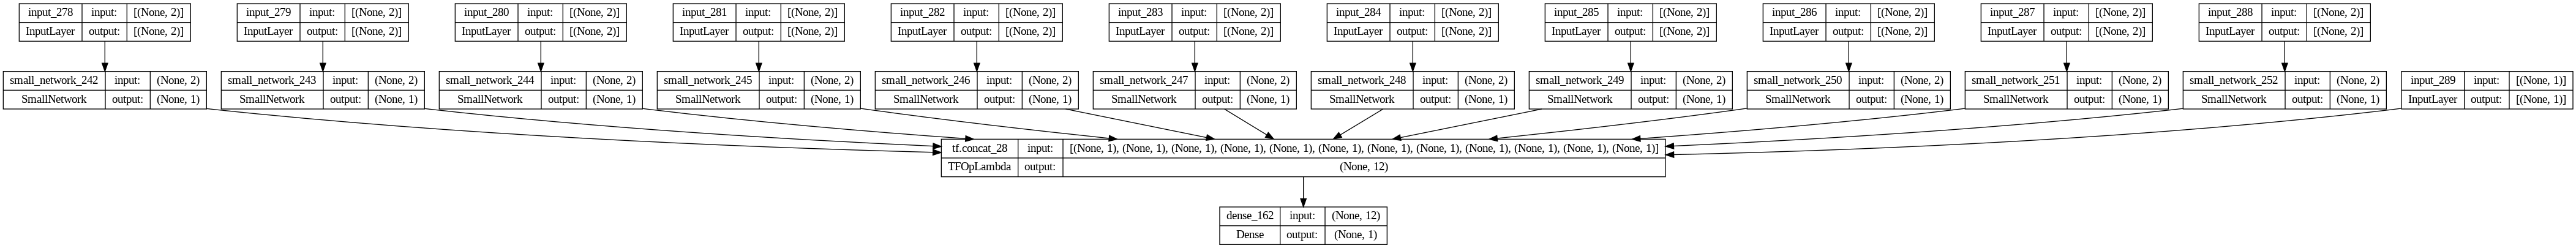

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
small_models_2 = {}
inputs = {}
for i in range(len(categorical_variables)):
  small_models_2[categorical_variables[i]] = SmallNetwork([3,1])
  inputs[categorical_variables[i]] = Input(shape=(2,))
inputs['rest'] = Input(shape=(len(binary_variables)+len(continuous_variables),))


small_models_outputs_2 = {k: small_models_2[k](inputs[k]) for k in categorical_variables}
h = tf.concat([*small_models_outputs_2.values()], axis=-1)
h = Dense(1, activation='sigmoid')(h)

h = tf.concat([h, inputs['rest']], axis=-1)
outputs_2 = Dense(1, activation='sigmoid', kernel_initializer = Constant(value =0), bias_initializer = Constant(value = 0))(h)
model_2 = Model(inputs=inputs, outputs=outputs_2)
model_2.summary()

Model: "model_96"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_290 (InputLayer)      [(None, 2)]                  0         []                            
                                                                                                  
 input_291 (InputLayer)      [(None, 2)]                  0         []                            
                                                                                                  
 input_292 (InputLayer)      [(None, 2)]                  0         []                            
                                                                                                  
 input_293 (InputLayer)      [(None, 2)]                  0         []                            
                                                                                           

In [ ]:
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=[keras.metrics.BinaryAccuracy()])
time_callback = TimeHistory()

if early_stopping_bool:
  early_stopping = EarlyStopping(monitor='val_loss', patience=3)
  history2 = model_2.fit(train_ds, epochs=total_epochs, validation_data= test_ds, callbacks=[time_callback, early_stopping])
else:
  history2 = model_2.fit(train_ds, epochs=total_epochs, validation_data= test_ds, callbacks=[time_callback])


time2 = time_callback.total_time

Epoch 1/300
4/4 [==============================] - 5s 164ms/step - loss: 0.6928 - binary_accuracy: 0.5323 - val_loss: 0.6919 - val_binary_accuracy: 0.5798
Epoch 2/300
4/4 [==============================] - 0s 53ms/step - loss: 0.6919 - binary_accuracy: 0.5806 - val_loss: 0.6913 - val_binary_accuracy: 0.5798
Epoch 3/300
4/4 [==============================] - 0s 53ms/step - loss: 0.6914 - binary_accuracy: 0.5806 - val_loss: 0.6906 - val_binary_accuracy: 0.5798
Epoch 4/300
4/4 [==============================] - 0s 102ms/step - loss: 0.6914 - binary_accuracy: 0.5806 - val_loss: 0.6898 - val_binary_accuracy: 0.5798
Epoch 5/300
4/4 [==============================] - 0s 96ms/step - loss: 0.6904 - binary_accuracy: 0.5806 - val_loss: 0.6893 - val_binary_accuracy: 0.5798
Epoch 6/300
4/4 [==============================] - 0s 106ms/step - loss: 0.6899 - binary_accuracy: 0.5806 - val_loss: 0.6889 - val_binary_accuracy: 0.5798
Epoch 7/300
4/4 [==============================] - 0s 98ms/step - loss: 0

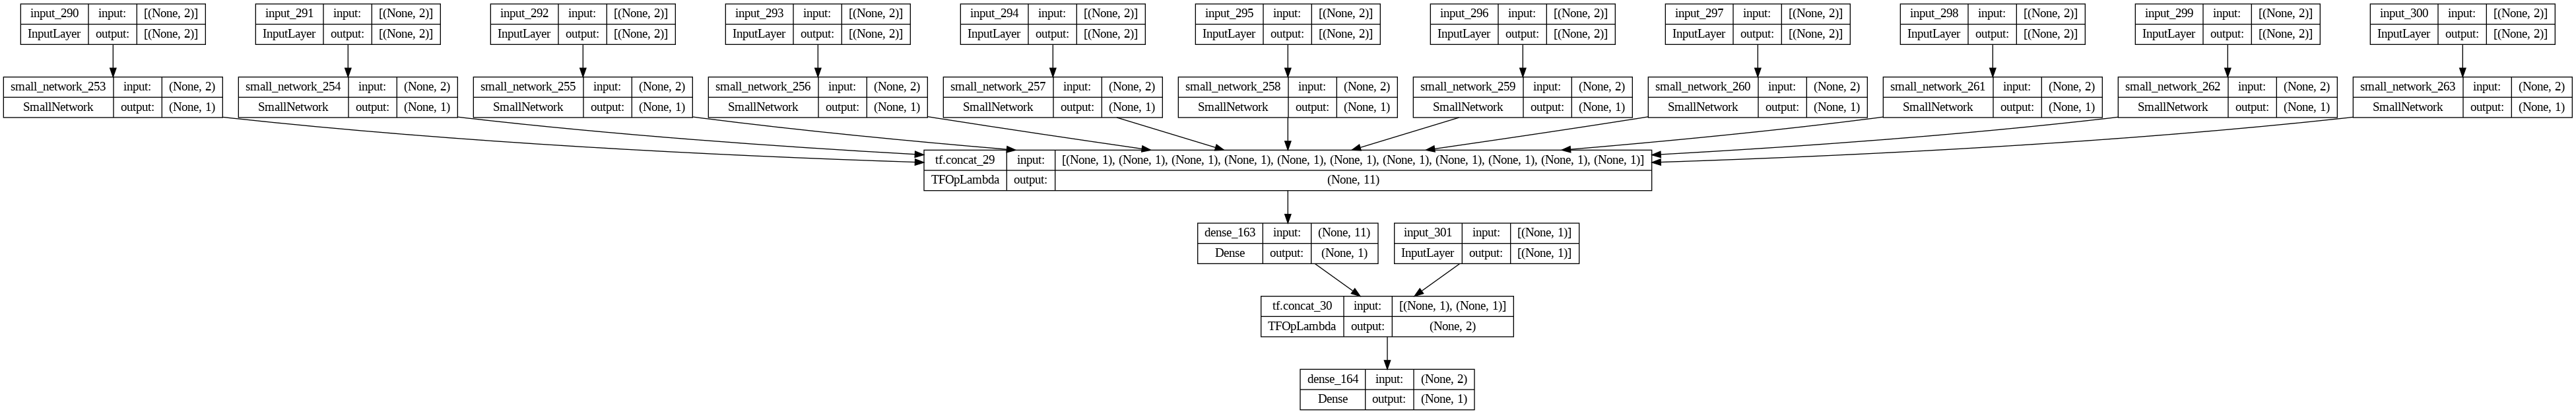

In [ ]:
plot_model(model_2, show_shapes=True, show_layer_names=True)

In [ ]:
for cat in categorical_variables:
  select_dataset = list_datasets[cat]
  select_dataset['M2_encoder'] = 0
  for i in range(select_dataset.shape[0]):
    pos = select_dataset['pos'].iloc[i]
    neg = select_dataset['neg'].iloc[i]
    select_dataset['M2_encoder'].iloc[i] = small_models_2[cat](tf.constant([[pos,neg]])).numpy()
  list_datasets[cat] = select_dataset

In [ ]:
X_train_mod_2 = X_train.copy()
X_test_mod_2 = X_test.copy()



for i in categorical_variables:
  X_train_mod_2[[i]] = X_train_mod_2[[i]].replace(list_datasets[i]['cat'].values, list_datasets[i]['tar'].values)
  X_test_mod_2[[i]] = X_test_mod_2[[i]].replace(list_datasets[i]['cat'].values, list_datasets[i]['tar'].values)


In [ ]:
X_train_mod_2

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
0,0.634615,0.575758,0.0,0.50000,0.630435,0.603175,1.000000,0.625,1.000000,0.584615,0.833333,0.500000
1,0.833333,0.566667,4.6,0.50000,0.375000,0.603175,0.461538,0.625,0.250000,0.562500,0.333333,0.500000
2,0.000000,0.566667,0.0,0.58000,0.375000,0.533333,0.576923,0.480,0.622222,0.727273,0.333333,0.638298
3,0.500000,0.566667,5.0,0.58000,0.630435,0.603175,0.461538,0.625,0.809524,0.727273,0.437500,0.638298
4,0.500000,0.566667,4.8,0.55814,0.630435,0.603175,0.576923,0.480,0.622222,0.000000,0.568966,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
119,0.384615,0.566667,4.7,0.55814,0.375000,0.603175,0.461538,0.625,0.400000,0.562500,0.333333,0.638298
120,0.588235,0.566667,0.0,0.58000,0.285714,0.285714,0.576923,0.625,0.622222,0.727273,0.000000,0.638298
121,0.634615,0.566667,5.0,0.50000,0.630435,0.603175,0.576923,0.625,0.622222,0.584615,0.568966,0.518519
122,0.285714,0.575758,4.6,0.58000,0.630435,0.603175,0.576923,0.625,0.622222,0.562500,0.500000,0.638298


In [ ]:
train_ds_encoder = tf.data.Dataset.from_tensor_slices((X_train_mod_2.values.astype(np.float32), y_train.values))
test_ds_encoder = tf.data.Dataset.from_tensor_slices((X_test_mod_2.values.astype(np.float32),  y_test.values))


In [ ]:
def split_inputs_encoder(x, y):
  return ({'all':x}, y)


train_ds_encoder = train_ds_encoder.map(split_inputs_encoder)
test_ds_encoder = test_ds_encoder.map(split_inputs_encoder)
train_ds_encoder

<_MapDataset element_spec=({'all': TensorSpec(shape=(12,), dtype=tf.float32, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
train_ds_encoder = train_ds_encoder.shuffle(500).batch(32)
test_ds_encoder = test_ds_encoder.batch(32)

In [ ]:
all = Input(shape=(X_train_mod_2.shape[1],))
outputs_3 = Dense(1, activation='sigmoid', kernel_initializer = Constant(value =0), bias_initializer = Constant(value = 0))(all)
model_3 = Model(inputs={"all": all}, outputs=outputs_3)
model_3.summary()

Model: "model_97"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_302 (InputLayer)      [(None, 12)]              0         
                                                                 
 dense_165 (Dense)           (None, 1)                 13        
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=[keras.metrics.BinaryAccuracy()])
time_callback = TimeHistory()

if early_stopping_bool:
  early_stopping = EarlyStopping(monitor='val_loss', patience=3)
  history3 =model_3.fit(train_ds_encoder, epochs=total_epochs, validation_data= test_ds_encoder, callbacks=[time_callback, early_stopping])
else:
  history3 =model_3.fit(train_ds_encoder, epochs=total_epochs, validation_data= test_ds_encoder, callbacks=[time_callback])


time3 = time_callback.total_time

Epoch 1/300
4/4 [==============================] - 1s 64ms/step - loss: 0.6919 - binary_accuracy: 0.5484 - val_loss: 0.6911 - val_binary_accuracy: 0.5798
Epoch 2/300
4/4 [==============================] - 0s 14ms/step - loss: 0.6890 - binary_accuracy: 0.5806 - val_loss: 0.6893 - val_binary_accuracy: 0.5798
Epoch 3/300
4/4 [==============================] - 0s 12ms/step - loss: 0.6879 - binary_accuracy: 0.5806 - val_loss: 0.6873 - val_binary_accuracy: 0.5798
Epoch 4/300
4/4 [==============================] - 0s 11ms/step - loss: 0.6848 - binary_accuracy: 0.5806 - val_loss: 0.6860 - val_binary_accuracy: 0.5798
Epoch 5/300
4/4 [==============================] - 0s 13ms/step - loss: 0.6829 - binary_accuracy: 0.5806 - val_loss: 0.6848 - val_binary_accuracy: 0.5798
Epoch 6/300
4/4 [==============================] - 0s 16ms/step - loss: 0.6821 - binary_accuracy: 0.5806 - val_loss: 0.6836 - val_binary_accuracy: 0.5798
Epoch 7/300
4/4 [==============================] - 0s 13ms/step - loss: 0.68

In [ ]:
X_train_mod_3 = X_train[binary_variables + continuous_variables].copy()
X_test_mod_3 = X_test[binary_variables + continuous_variables].copy()

X_train_mod_3

,V4
0,0.0
1,4.6
2,0.0
3,5.0
4,4.8
...,...
119,4.7
120,0.0
121,5.0
122,4.6


In [ ]:
train_ds_nocat = tf.data.Dataset.from_tensor_slices((X_train_mod_3.values.astype(np.float32), y_train.values))
test_ds_nocat = tf.data.Dataset.from_tensor_slices((X_test_mod_3.values.astype(np.float32),  y_test.values))


train_ds_nocat = train_ds_nocat.map(split_inputs_encoder)
test_ds_nocat = test_ds_nocat.map(split_inputs_encoder)
train_ds_nocat = train_ds_nocat.shuffle(500).batch(32)
test_ds_nocat = test_ds_nocat.batch(32)


In [ ]:
all = Input(shape=(X_train_mod_3.shape[1],))

outputs_4 = Dense(1, activation='sigmoid', kernel_initializer = Constant(value =0), bias_initializer = Constant(value = 0))(all)

model_4 = Model(inputs={"all": all}, outputs=outputs_4)


model_4.summary()

Model: "model_98"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_303 (InputLayer)      [(None, 1)]               0         
                                                                 
 dense_166 (Dense)           (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_4.compile(loss='binary_crossentropy', optimizer='adam', metrics=[keras.metrics.BinaryAccuracy()])
time_callback = TimeHistory()


if early_stopping_bool:
  early_stopping = EarlyStopping(monitor='val_loss', patience=3)
  history4 = model_4.fit(train_ds_nocat, epochs=total_epochs, validation_data=test_ds_nocat, callbacks=[time_callback,early_stopping])
else:
  history4 = model_4.fit(train_ds_nocat, epochs=total_epochs, validation_data=test_ds_nocat, callbacks=[time_callback])
time4 = time_callback.total_time

Epoch 1/300
4/4 [==============================] - 2s 53ms/step - loss: 0.6930 - binary_accuracy: 0.5161 - val_loss: 0.6920 - val_binary_accuracy: 0.5798
Epoch 2/300
4/4 [==============================] - 0s 15ms/step - loss: 0.6920 - binary_accuracy: 0.5806 - val_loss: 0.6913 - val_binary_accuracy: 0.5798
Epoch 3/300
4/4 [==============================] - 0s 12ms/step - loss: 0.6918 - binary_accuracy: 0.5806 - val_loss: 0.6906 - val_binary_accuracy: 0.5798
Epoch 4/300
4/4 [==============================] - 0s 13ms/step - loss: 0.6911 - binary_accuracy: 0.5806 - val_loss: 0.6900 - val_binary_accuracy: 0.5798
Epoch 5/300
4/4 [==============================] - 0s 12ms/step - loss: 0.6905 - binary_accuracy: 0.5806 - val_loss: 0.6896 - val_binary_accuracy: 0.5798
Epoch 6/300
4/4 [==============================] - 0s 28ms/step - loss: 0.6903 - binary_accuracy: 0.5806 - val_loss: 0.6890 - val_binary_accuracy: 0.5798
Epoch 7/300
4/4 [==============================] - 0s 28ms/step - loss: 0.68

In [ ]:
weights_from_small_net_target = {}
bias_from_small_net_target = {}

def split_inputs_encoder(x, y):
  return ({'all':x}, y)


for which_column in categorical_variables:
  dataset_target_encoder = list_datasets[which_column][['pos','neg','tar']]



  # dataset_target_encoder.drop('cat', axis=1, inplace = True)


  x_target, y_target =  dataset_to_Xandy(dataset_target_encoder, 'tar', only_X = False)
  train_target = tf.data.Dataset.from_tensor_slices((x_target.values.astype(np.float32), y_target.values))
  train_target = train_target.map(split_inputs_encoder)
  train_target = train_target.shuffle(500).batch(32)

  all = Input(shape=(2,))

  h = Dense(3, activation='sigmoid')(all)
  output_target = Dense(1, activation='sigmoid')(h)

  model_target = Model(inputs={"all": all}, outputs=output_target)
  early_stopping = EarlyStopping(monitor='loss', patience=3)
  model_target.compile(loss='MSE', optimizer='adam')



  model_target.fit(train_target, epochs=100 ,callbacks = [early_stopping])

  weights_from_small_net_target[which_column] = model_target.trainable_variables


Epoch 1/100
1/1 [==============================] - 1s 635ms/step - loss: 0.0558
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 0.0555
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 0.0552
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 0.0548
Epoch 5/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0545
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0542
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 0.0538
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 0.0535
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 0.0531
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 0.0528
Epoch 11/100
1/1 [==============================] - 0s 13ms/step - loss: 0.0524
Epoch 12/100
1/1 [==============================] - 0s 17ms/step - loss: 0.0521
Epoch 13/100
1/1 [==============================] -

In [ ]:
weights_from_small_net_target

{'V3': [<tf.Variable 'dense_167/kernel:0' shape=(2, 3) dtype=float32, numpy=
  array([[-0.73497725,  0.5125009 ,  0.87131333],
         [-1.0261343 , -0.77637655, -0.41812277]], dtype=float32)>,
  <tf.Variable 'dense_167/bias:0' shape=(3,) dtype=float32, numpy=array([-0.08197341, -0.09561986, -0.10120806], dtype=float32)>,
  <tf.Variable 'dense_168/kernel:0' shape=(3, 1) dtype=float32, numpy=
  array([[0.3132404 ],
         [0.8918982 ],
         [0.67600775]], dtype=float32)>,
  <tf.Variable 'dense_168/bias:0' shape=(1,) dtype=float32, numpy=array([-0.09174628], dtype=float32)>],
 'V5': [<tf.Variable 'dense_169/kernel:0' shape=(2, 3) dtype=float32, numpy=
  array([[ 1.0390686 ,  0.9380241 , -0.33017713],
         [ 0.5322665 ,  0.48134074,  0.43355277]], dtype=float32)>,
  <tf.Variable 'dense_169/bias:0' shape=(3,) dtype=float32, numpy=array([ 0.02198195, -0.08882907, -0.10907258], dtype=float32)>,
  <tf.Variable 'dense_170/kernel:0' shape=(3, 1) dtype=float32, numpy=
  array([[-0.059

In [ ]:
small_models_5 = {}
for i in range(len(categorical_variables)):
  small_models_5[categorical_variables[i]] = SmallNetwork([3,1])

small_models_outputs_5 = {k: small_models_5[k](inputs[k]) for k in categorical_variables}
h = tf.concat([*small_models_outputs_5.values(), inputs['rest']], axis=-1)
outputs_5 = Dense(1, activation='sigmoid', kernel_initializer = Constant(value =0), bias_initializer = Constant(value = 0))(h)
model_5 = Model(inputs=inputs, outputs=outputs_5)
model_5.summary()

Model: "model_110"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_290 (InputLayer)      [(None, 2)]                  0         []                            
                                                                                                  
 input_291 (InputLayer)      [(None, 2)]                  0         []                            
                                                                                                  
 input_292 (InputLayer)      [(None, 2)]                  0         []                            
                                                                                                  
 input_293 (InputLayer)      [(None, 2)]                  0         []                            
                                                                                          

In [ ]:
for which_col in categorical_variables:
  list_current_weights = weights_from_small_net_target[which_col]

  for i in range(len(list_current_weights)):
    small_models_5[which_col].trainable_variables[i].assign(list_current_weights[i])

  print(small_models_5[which_col].trainable_variables)

[<tf.Variable 'small_network_264/dense/kernel:0' shape=(2, 3) dtype=float32, numpy=
array([[-0.73497725,  0.5125009 ,  0.87131333],
       [-1.0261343 , -0.77637655, -0.41812277]], dtype=float32)>, <tf.Variable 'small_network_264/dense/bias:0' shape=(3,) dtype=float32, numpy=array([-0.08197341, -0.09561986, -0.10120806], dtype=float32)>, <tf.Variable 'small_network_264/dense_1/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[0.3132404 ],
       [0.8918982 ],
       [0.67600775]], dtype=float32)>, <tf.Variable 'small_network_264/dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([-0.09174628], dtype=float32)>]
[<tf.Variable 'small_network_265/dense/kernel:0' shape=(2, 3) dtype=float32, numpy=
array([[ 1.0390686 ,  0.9380241 , -0.33017713],
       [ 0.5322665 ,  0.48134074,  0.43355277]], dtype=float32)>, <tf.Variable 'small_network_265/dense/bias:0' shape=(3,) dtype=float32, numpy=array([ 0.02198195, -0.08882907, -0.10907258], dtype=float32)>, <tf.Variable 'small_network_265/dens

In [ ]:
model_5.compile(loss='binary_crossentropy', optimizer='adam', metrics=[keras.metrics.BinaryAccuracy()])


time_callback = TimeHistory()

if early_stopping_bool:
  early_stopping = EarlyStopping(monitor='val_loss', patience=3)
  history5 = model_5.fit(train_ds, epochs = total_epochs, validation_data= test_ds, callbacks=[time_callback,early_stopping])
else:
  history5 = model_5.fit(train_ds, epochs = total_epochs, validation_data= test_ds, callbacks=[time_callback])


time5 = time_callback.total_time

Epoch 1/300
4/4 [==============================] - 7s 172ms/step - loss: 0.6925 - binary_accuracy: 0.5323 - val_loss: 0.6915 - val_binary_accuracy: 0.5798
Epoch 2/300
4/4 [==============================] - 0s 65ms/step - loss: 0.6909 - binary_accuracy: 0.5806 - val_loss: 0.6895 - val_binary_accuracy: 0.5798
Epoch 3/300
4/4 [==============================] - 0s 54ms/step - loss: 0.6889 - binary_accuracy: 0.5806 - val_loss: 0.6877 - val_binary_accuracy: 0.5798
Epoch 4/300
4/4 [==============================] - 0s 57ms/step - loss: 0.6875 - binary_accuracy: 0.5806 - val_loss: 0.6861 - val_binary_accuracy: 0.5798
Epoch 5/300
4/4 [==============================] - 0s 55ms/step - loss: 0.6862 - binary_accuracy: 0.5806 - val_loss: 0.6849 - val_binary_accuracy: 0.5798
Epoch 6/300
4/4 [==============================] - 0s 82ms/step - loss: 0.6849 - binary_accuracy: 0.5806 - val_loss: 0.6841 - val_binary_accuracy: 0.5798
Epoch 7/300
4/4 [==============================] - 0s 55ms/step - loss: 0.6

In [ ]:
model_5.trainable_variables

[<tf.Variable 'small_network_264/dense/kernel:0' shape=(2, 3) dtype=float32, numpy=
 array([[-0.7076918 ,  0.49622476,  0.80484515],
        [-1.0280687 , -0.8172338 , -0.5306953 ]], dtype=float32)>,
 <tf.Variable 'small_network_264/dense/bias:0' shape=(3,) dtype=float32, numpy=array([-0.06088528, -0.05004583, -0.18080842], dtype=float32)>,
 <tf.Variable 'small_network_264/dense_1/kernel:0' shape=(3, 1) dtype=float32, numpy=
 array([[0.34097862],
        [1.1226637 ],
        [0.6348769 ]], dtype=float32)>,
 <tf.Variable 'small_network_264/dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([-0.13897333], dtype=float32)>,
 <tf.Variable 'small_network_265/dense/kernel:0' shape=(2, 3) dtype=float32, numpy=
 array([[ 1.0647969 ,  1.2298623 , -0.28252122],
        [ 0.49491906,  0.22373515,  0.44068074]], dtype=float32)>,
 <tf.Variable 'small_network_265/dense/bias:0' shape=(3,) dtype=float32, numpy=array([ 0.01307161, -0.05732808, -0.01315963], dtype=float32)>,
 <tf.Variable 'small_netw

In [ ]:
for cat in categorical_variables:
  select_dataset = list_datasets[cat]
  select_dataset['M5_encoder'] = 0
  for i in range(select_dataset.shape[0]):
    pos = select_dataset['pos'].iloc[i]
    neg = select_dataset['neg'].iloc[i]
    select_dataset['M5_encoder'].iloc[i] = small_models_5[cat](tf.constant([[pos,neg]])).numpy()
  list_datasets[cat] = select_dataset

In [ ]:
train_objs_num = X_train.shape[0]
test_objs_num = X_test.shape[0]
keys = []
X_train_mod_one_hot = X_train[binary_variables + continuous_variables].copy()
X_test_mod_one_hot = X_test[binary_variables + continuous_variables].copy()
how_many_cat_percolumn = []

encoded_onehot_categories={}


for cat in categorical_variables:
  dataset = pd.concat(objs=[X_train[cat], X_test[cat],list_datasets[cat]['cat']], axis=0)
  dataset_preprocessed = pd.get_dummies(dataset)
  train_preprocessed = dataset_preprocessed[:train_objs_num]
  test_preprocessed = dataset_preprocessed[train_objs_num:train_objs_num+test_objs_num]

  encoded_onehot_categories[cat] = dataset_preprocessed[train_objs_num+test_objs_num:]

  how_many_categories = train_preprocessed.shape[1]

  keys += [cat+'_one_hot_'+str(i) for i in range(1,how_many_categories+1)]

  X_train_mod_one_hot = pd.concat([X_train_mod_one_hot, train_preprocessed], axis = 1)
  X_train_mod_one_hot.columns = binary_variables + continuous_variables + keys

  X_test_mod_one_hot = pd.concat([X_test_mod_one_hot, test_preprocessed], axis = 1)
  X_test_mod_one_hot.columns = binary_variables + continuous_variables + keys

  how_many_cat_percolumn.append(how_many_categories)


In [ ]:
X_train_mod_one_hot = X_train_mod_one_hot[keys + binary_variables + continuous_variables]
X_test_mod_one_hot = X_test_mod_one_hot[keys + binary_variables + continuous_variables]

In [ ]:
X_train_mod_one_hot= X_train_mod_one_hot.values
X_test_mod_one_hot = X_test_mod_one_hot.values

In [ ]:
train_ds_onehot = tf.data.Dataset.from_tensor_slices((X_train_mod_one_hot.astype(np.float32), y_train))
test_ds_onehot = tf.data.Dataset.from_tensor_slices((X_test_mod_one_hot.astype(np.float32), y_test))

In [ ]:


def split_inputs_onehot(x, y, categorical_variables, how_many_cat_percolumn):
  how_many_cat_variables = len(categorical_variables)
  dictionary = {}
  how_many_so_far = 0
  for index in range(how_many_cat_variables):
    dictionary[categorical_variables[index]] = tf.cast(x[how_many_so_far : how_many_so_far + how_many_cat_percolumn[index]], dtype = 'int32')
    how_many_so_far += how_many_cat_percolumn[index]

  dictionary['rest'] = x[how_many_so_far:]
  return (dictionary, y)

f = partial(split_inputs_onehot, categorical_variables=categorical_variables, how_many_cat_percolumn = how_many_cat_percolumn)
train_ds_onehot = train_ds_onehot.map(f)
test_ds_onehot = test_ds_onehot.map(f)
train_ds_onehot




<_MapDataset element_spec=({'V3': TensorSpec(shape=(8,), dtype=tf.int32, name=None), 'V5': TensorSpec(shape=(7,), dtype=tf.int32, name=None), 'V6': TensorSpec(shape=(9,), dtype=tf.int32, name=None), 'V12': TensorSpec(shape=(25,), dtype=tf.int32, name=None), 'V9': TensorSpec(shape=(5,), dtype=tf.int32, name=None), 'V11': TensorSpec(shape=(23,), dtype=tf.int32, name=None), 'V7': TensorSpec(shape=(17,), dtype=tf.int32, name=None), 'V8': TensorSpec(shape=(18,), dtype=tf.int32, name=None), 'V10': TensorSpec(shape=(24,), dtype=tf.int32, name=None), 'V13': TensorSpec(shape=(15,), dtype=tf.int32, name=None), 'V2': TensorSpec(shape=(13,), dtype=tf.int32, name=None), 'rest': TensorSpec(shape=(1,), dtype=tf.float32, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [ ]:
for e in test_ds_onehot.take(1):
  print(e)

({'V3': <tf.Tensor: shape=(8,), dtype=int32, numpy=array([0, 0, 0, 1, 0, 0, 0, 0], dtype=int32)>, 'V5': <tf.Tensor: shape=(7,), dtype=int32, numpy=array([0, 1, 0, 0, 0, 0, 0], dtype=int32)>, 'V6': <tf.Tensor: shape=(9,), dtype=int32, numpy=array([0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int32)>, 'V12': <tf.Tensor: shape=(25,), dtype=int32, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0], dtype=int32)>, 'V9': <tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 0, 1, 0, 0], dtype=int32)>, 'V11': <tf.Tensor: shape=(23,), dtype=int32, numpy=
array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int32)>, 'V7': <tf.Tensor: shape=(17,), dtype=int32, numpy=array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)>, 'V8': <tf.Tensor: shape=(18,), dtype=int32, numpy=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int32)>, 'V10': <tf.Tensor: shape=(24,), dtype=int32, numpy=
array([1, 0,

In [ ]:
train_ds_onehot = train_ds_onehot.shuffle(500).batch(32)
test_ds_onehot = test_ds_onehot.batch(32)

In [ ]:
small_models_onehot = {}
inputs_onehot = {}
for i in range(len(categorical_variables)):
  small_models_onehot[categorical_variables[i]] = SmallNetwork([3,1])
  inputs_onehot[categorical_variables[i]] = Input(shape=(how_many_cat_percolumn[i],))
inputs_onehot['rest'] = Input(shape=(len(binary_variables)+len(continuous_variables),))


small_models_outputs_onehot = {k: small_models_onehot[k](inputs_onehot[k]) for k in categorical_variables}
h = tf.concat([*small_models_outputs_onehot.values(), inputs_onehot['rest']], axis=-1)
outputs_onehot = Dense(1, activation='sigmoid', kernel_initializer = Constant(value =0), bias_initializer = Constant(value = 0))(h)
model_onehot = Model(inputs=inputs_onehot, outputs=outputs_onehot)
model_onehot.summary()

Model: "model_111"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_315 (InputLayer)      [(None, 8)]                  0         []                            
                                                                                                  
 input_316 (InputLayer)      [(None, 7)]                  0         []                            
                                                                                                  
 input_317 (InputLayer)      [(None, 9)]                  0         []                            
                                                                                                  
 input_318 (InputLayer)      [(None, 25)]                 0         []                            
                                                                                          

In [ ]:
model_onehot.compile(loss='binary_crossentropy', optimizer='adam', metrics=[keras.metrics.BinaryAccuracy()])


time_callback = TimeHistory()

if early_stopping_bool:
  early_stopping = EarlyStopping(monitor='val_loss', patience=3)
  history6 = model_onehot.fit(train_ds_onehot, epochs = total_epochs, validation_data= test_ds_onehot, callbacks=[time_callback,early_stopping])
else:
  history6 = model_onehot.fit(train_ds_onehot, epochs = total_epochs, validation_data= test_ds_onehot, callbacks=[time_callback])

time6 = time_callback.total_time




Epoch 1/300
4/4 [==============================] - 6s 154ms/step - loss: 0.6929 - binary_accuracy: 0.4516 - val_loss: 0.6915 - val_binary_accuracy: 0.5798
Epoch 2/300
4/4 [==============================] - 0s 45ms/step - loss: 0.6912 - binary_accuracy: 0.5806 - val_loss: 0.6900 - val_binary_accuracy: 0.5798
Epoch 3/300
4/4 [==============================] - 0s 45ms/step - loss: 0.6897 - binary_accuracy: 0.5806 - val_loss: 0.6887 - val_binary_accuracy: 0.5798
Epoch 4/300
4/4 [==============================] - 0s 45ms/step - loss: 0.6889 - binary_accuracy: 0.5806 - val_loss: 0.6873 - val_binary_accuracy: 0.5798
Epoch 5/300
4/4 [==============================] - 0s 44ms/step - loss: 0.6876 - binary_accuracy: 0.5806 - val_loss: 0.6863 - val_binary_accuracy: 0.5798
Epoch 6/300
4/4 [==============================] - 0s 46ms/step - loss: 0.6864 - binary_accuracy: 0.5806 - val_loss: 0.6855 - val_binary_accuracy: 0.5798
Epoch 7/300
4/4 [==============================] - 0s 40ms/step - loss: 0.6

In [ ]:
encoded_onehot_categories

{'V3':        ?  Average   High    Low  Medium   high    low  very-high
 0  False    False  False   True   False  False  False      False
 1  False    False   True  False   False  False  False      False
 2  False     True  False  False   False  False  False      False
 3  False    False  False  False    True  False  False      False
 4  False    False  False  False   False  False  False       True
 5  False    False  False  False   False  False   True      False
 6  False    False  False  False   False   True  False      False
 7   True    False  False  False   False  False  False      False,
 'V5':        L      M      S     XL   free      s  small
 0  False   True  False  False  False  False  False
 1   True  False  False  False  False  False  False
 2  False  False  False   True  False  False  False
 3  False  False  False  False   True  False  False
 4  False  False   True  False  False  False  False
 5  False  False  False  False  False  False   True
 6  False  False  False  Fals

In [ ]:
for cat in categorical_variables:
  select_dataset = encoded_onehot_categories[cat]
  select_dataset['M6_encoder'] = 0

  for i in range(select_dataset.shape[0]):
    see = list(select_dataset.iloc[i,:-1].values)
    select_dataset['M6_encoder'].iloc[i] = small_models_onehot[cat](tf.constant([see])).numpy()
  list_datasets[cat]['M6_encoder'] = select_dataset['M6_encoder']

In [ ]:
if have_cont:

  X_train_with_cont, y_train =  dataset_to_Xandy(df_train_with_cont, target_variable, only_X = False) ###### the original dataset
  X_test_with_cont, y_test =  dataset_to_Xandy(df_test_with_cont, target_variable, only_X = False) ###### the original dataset

  train_ds_with_cont = tf.data.Dataset.from_tensor_slices((X_train_with_cont.values.astype(np.float32), y_train.values))
  test_ds_with_cont = tf.data.Dataset.from_tensor_slices((X_test_with_cont.values.astype(np.float32),  y_test.values))

  for e in train_ds_with_cont.take(3):
    print(e)

  train_ds_with_cont = train_ds_with_cont.map(split_inputs_encoder)
  test_ds_with_cont = test_ds_with_cont.map(split_inputs_encoder)

  train_ds_with_cont = train_ds_with_cont.shuffle(500).batch(32)
  test_ds_with_cont = test_ds_with_cont.batch(32)

In [ ]:
if have_cont:
  all = Input(shape=(X_train_with_cont.shape[1],))

  outputs_7 = Dense(1, activation='sigmoid', kernel_initializer = Constant(value =0), bias_initializer = Constant(value = 0))(all)
  model_7 = Model(inputs={"all": all}, outputs=outputs_7)

  print(model_7.summary())
  model_7.compile(loss='binary_crossentropy', optimizer='adam', metrics=[keras.metrics.BinaryAccuracy()])
  time_callback = TimeHistory()

  if early_stopping_bool:
    early_stopping = EarlyStopping(monitor='val_loss', patience=3)
    history7 = model_7.fit(train_ds_with_cont, epochs=total_epochs, validation_data=test_ds_with_cont, callbacks=[time_callback, early_stopping])
  else:
    history7 = model_7.fit(train_ds_with_cont, epochs=total_epochs, validation_data=test_ds_with_cont, callbacks=[time_callback])

  time7 = time_callback.total_time

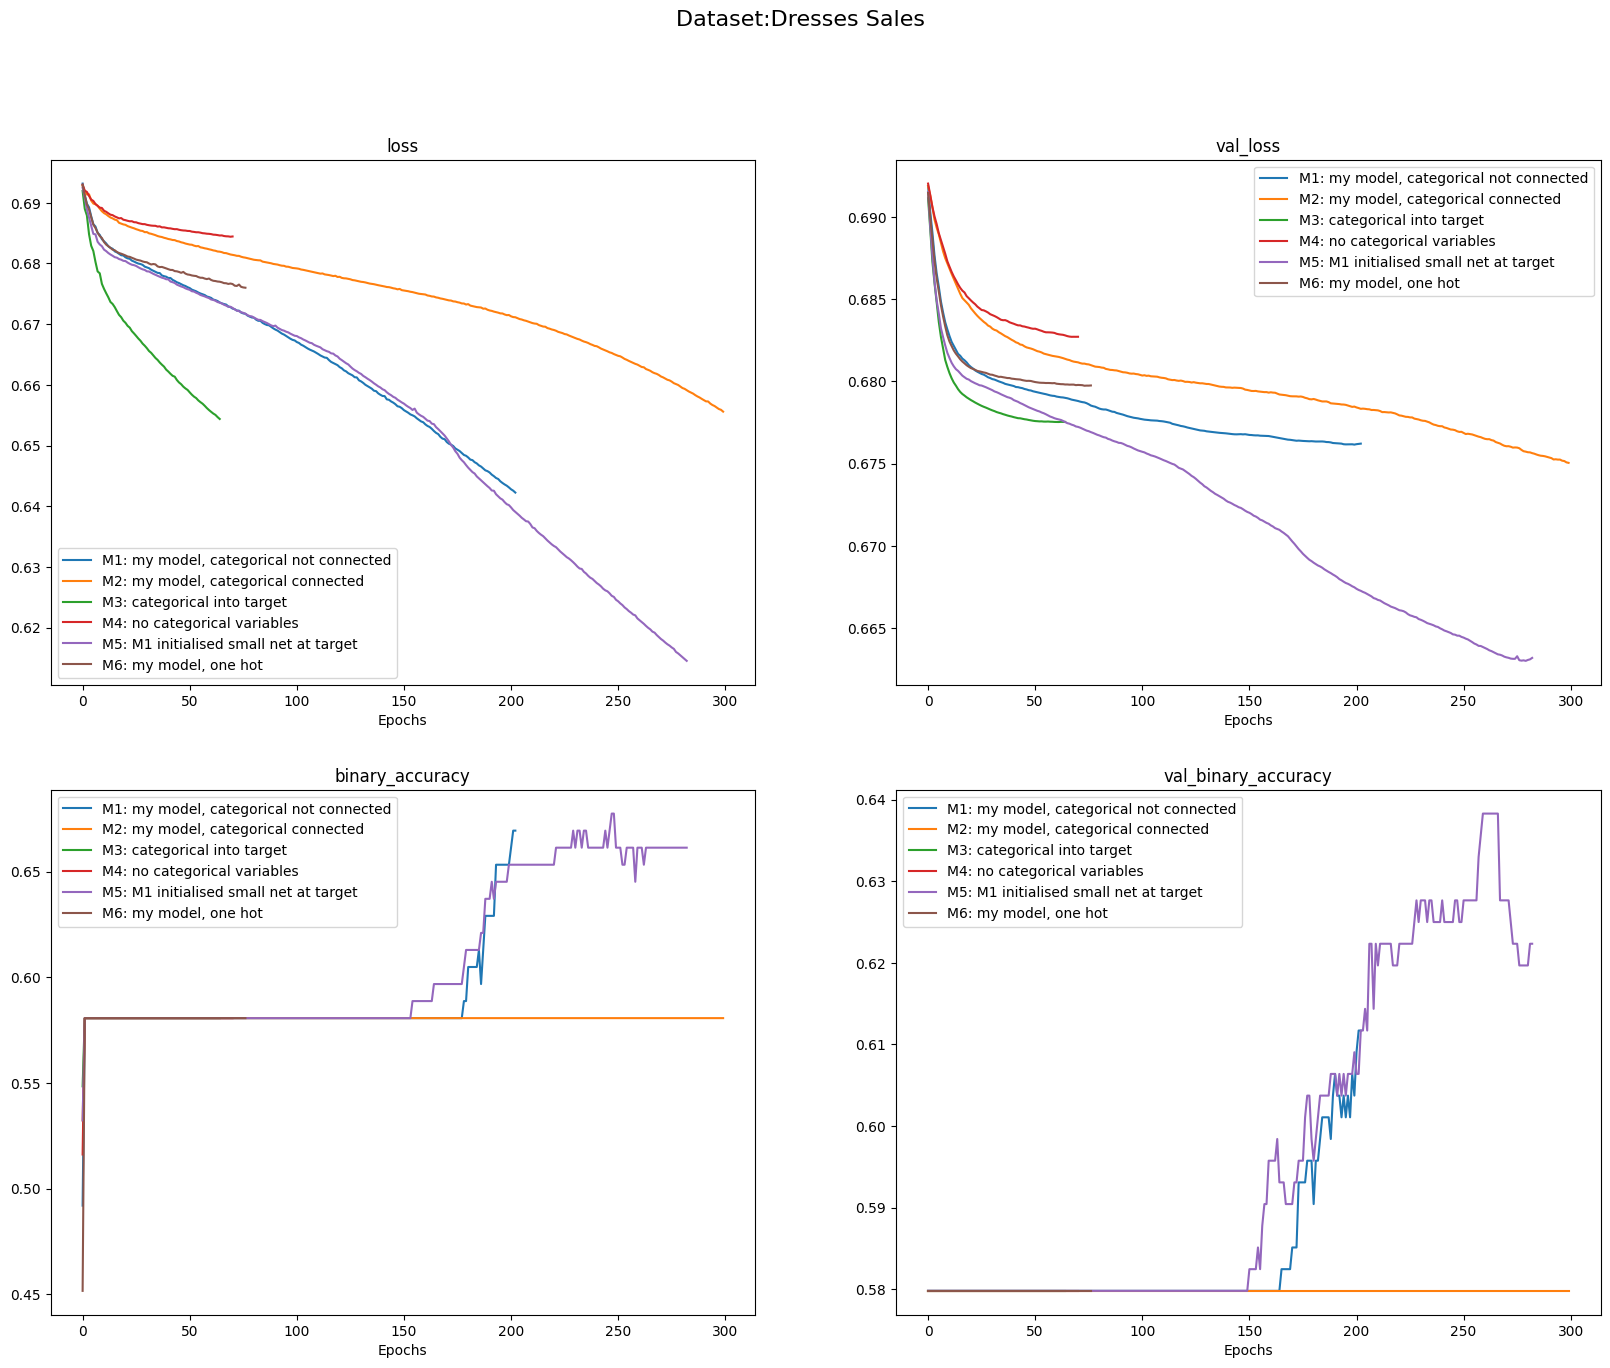

In [ ]:
index = 1
plt.figure(figsize=(20, 15))
for what in ['loss', 'val_loss','binary_accuracy','val_binary_accuracy']:
  plt.subplot(2, 2, index)
  index += 1

  plt.plot(history1.history[what], label='M1: my model, categorical not connected')
  plt.plot(history2.history[what], label='M2: my model, categorical connected')
  plt.plot(history3.history[what], label='M3: categorical into target')
  plt.plot(history4.history[what], label='M4: no categorical variables')
  plt.plot(history5.history[what], label='M5: M1 initialised small net at target')
  plt.plot(history6.history[what], label='M6: my model, one hot')
  if have_cont:
    plt.plot(history7.history[what], label='M7: all continuous - BEST WE CAN DO')
  plt.title(what)
  plt.xlabel('Epochs')
  plt.legend()

plt.suptitle('Dataset:' + which_dataset, fontsize=16)
plt.show()

In [ ]:
if have_cont:
  data_time = {
      'models': ['M1','M2','M3','M4','M5','M6','M7'],
      'time': [time1, time2, time3, time4, time5, time6, time7]
  }
else:
  data_time = {
      'models': ['M1','M2','M3','M4','M5','M6'],
      'time': [time1, time2, time3, time4, time5, time6]
  }

# Create a DataFrame using Pandas
dataset_timings = pd.DataFrame(data_time)
dataset_timings

,models,time
0,M1,68.499832
1,M2,103.966989
2,M3,5.089506
3,M4,9.320741
4,M5,94.111749
5,M6,25.758896


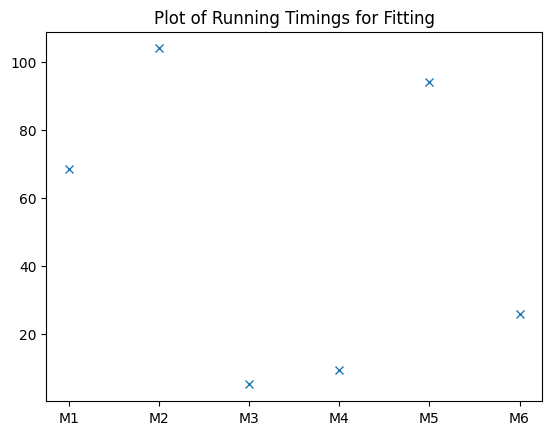

In [ ]:
plt.plot(dataset_timings['time'],'x')
plt.xticks(np.arange(0,dataset_timings.shape[0]), dataset_timings['models'])
plt.title('Plot of Running Timings for Fitting')
plt.show()

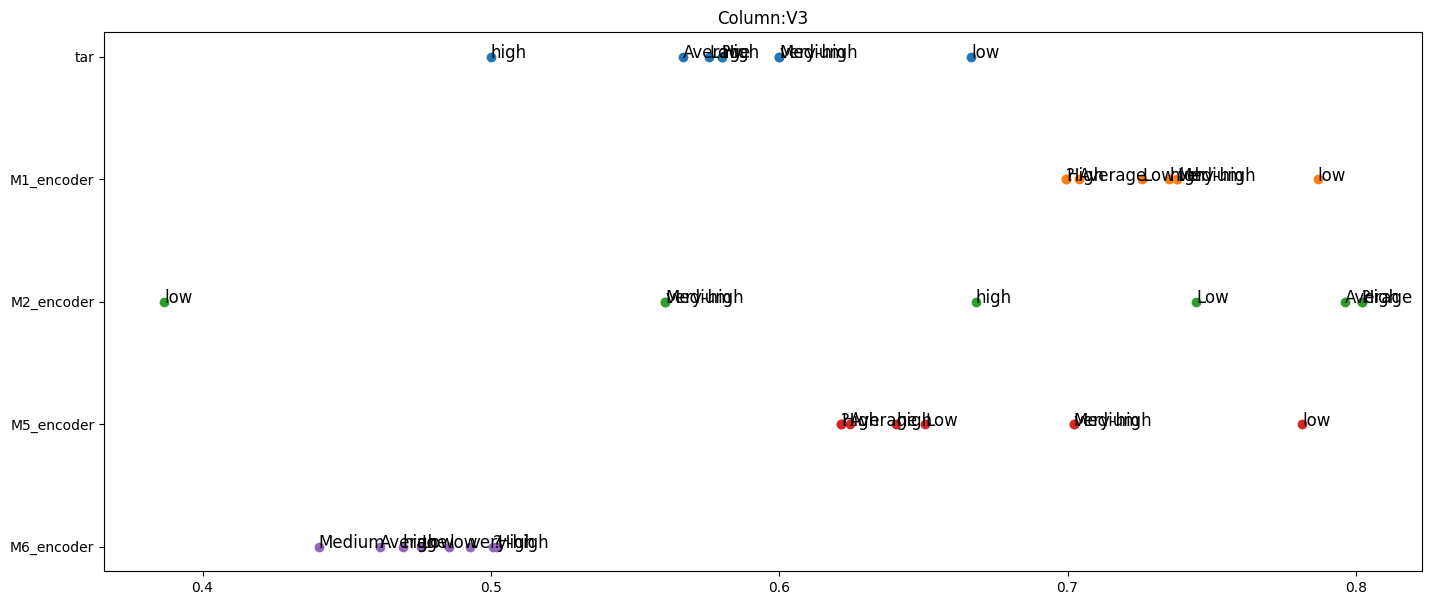

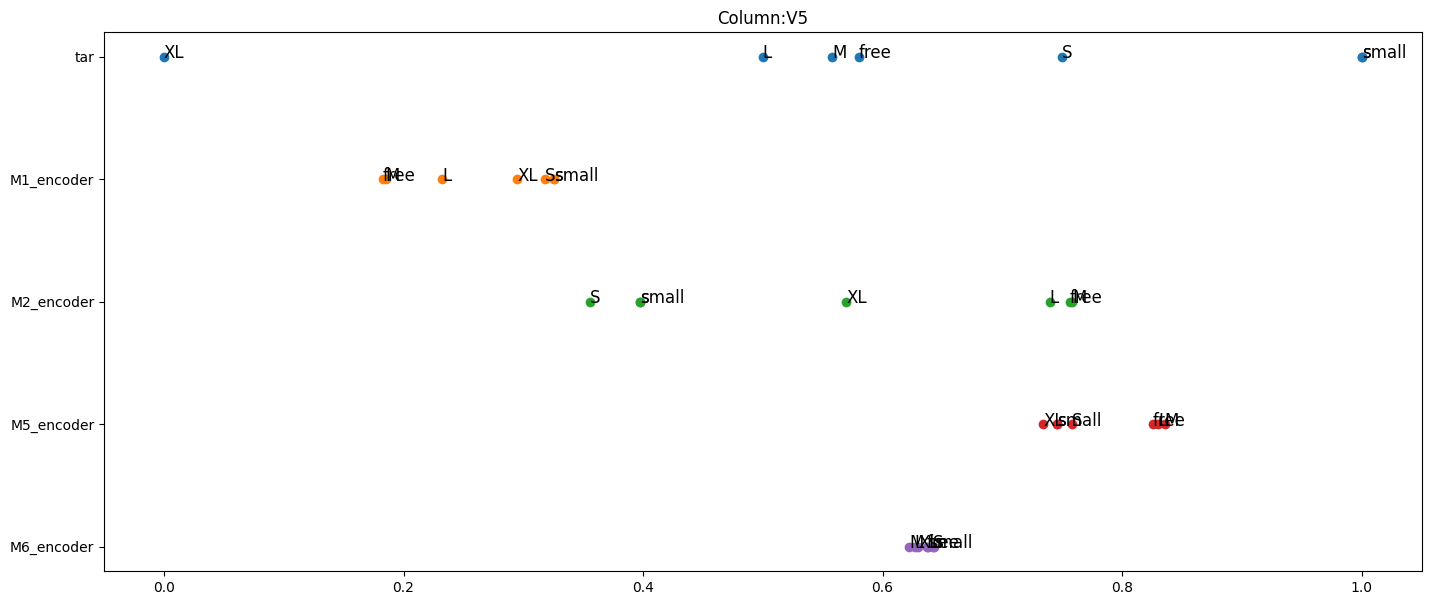

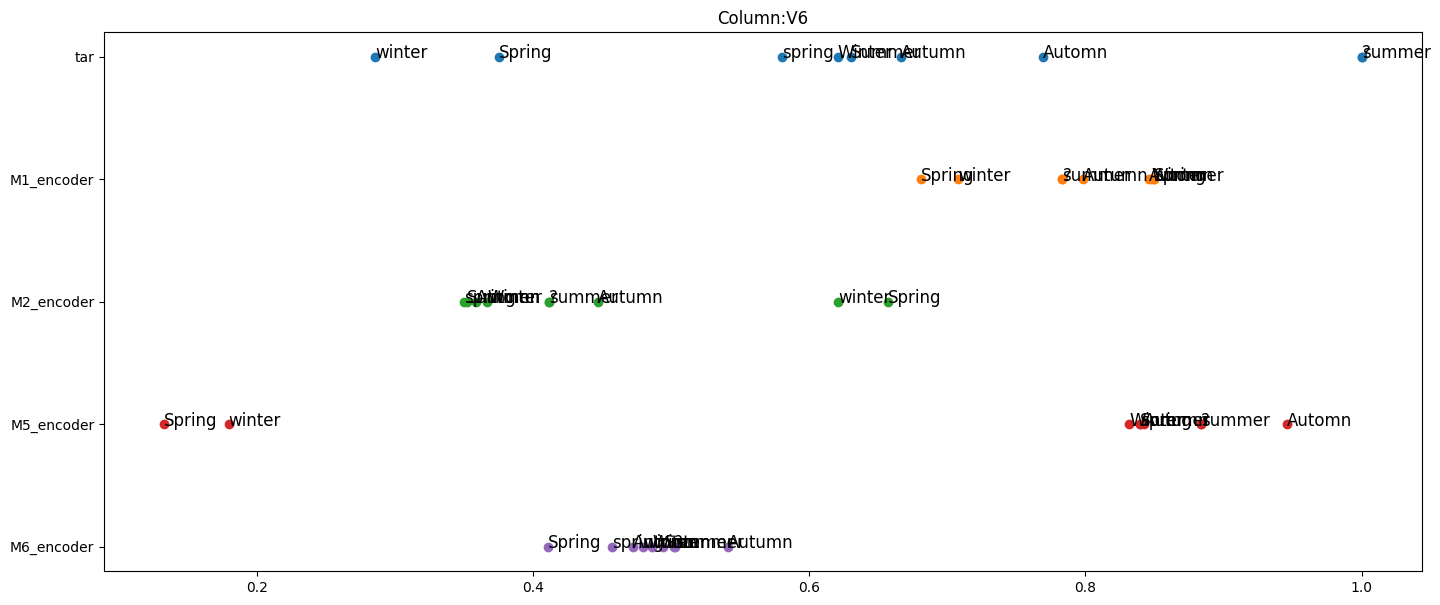

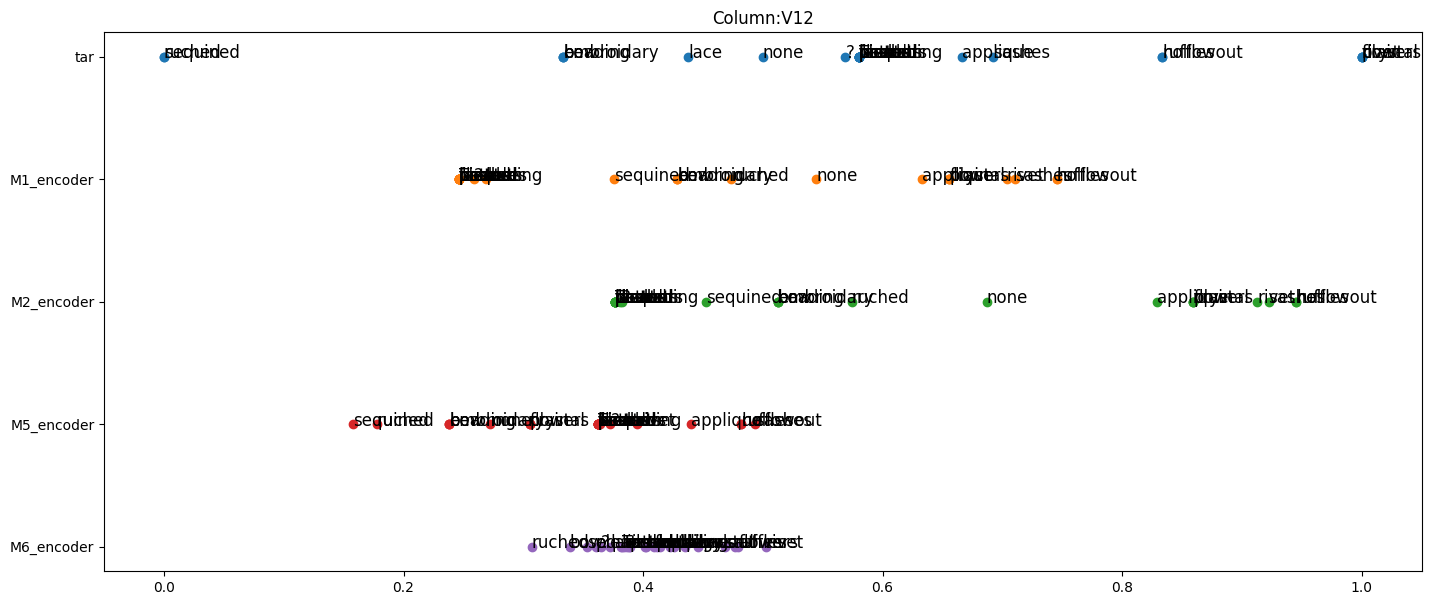

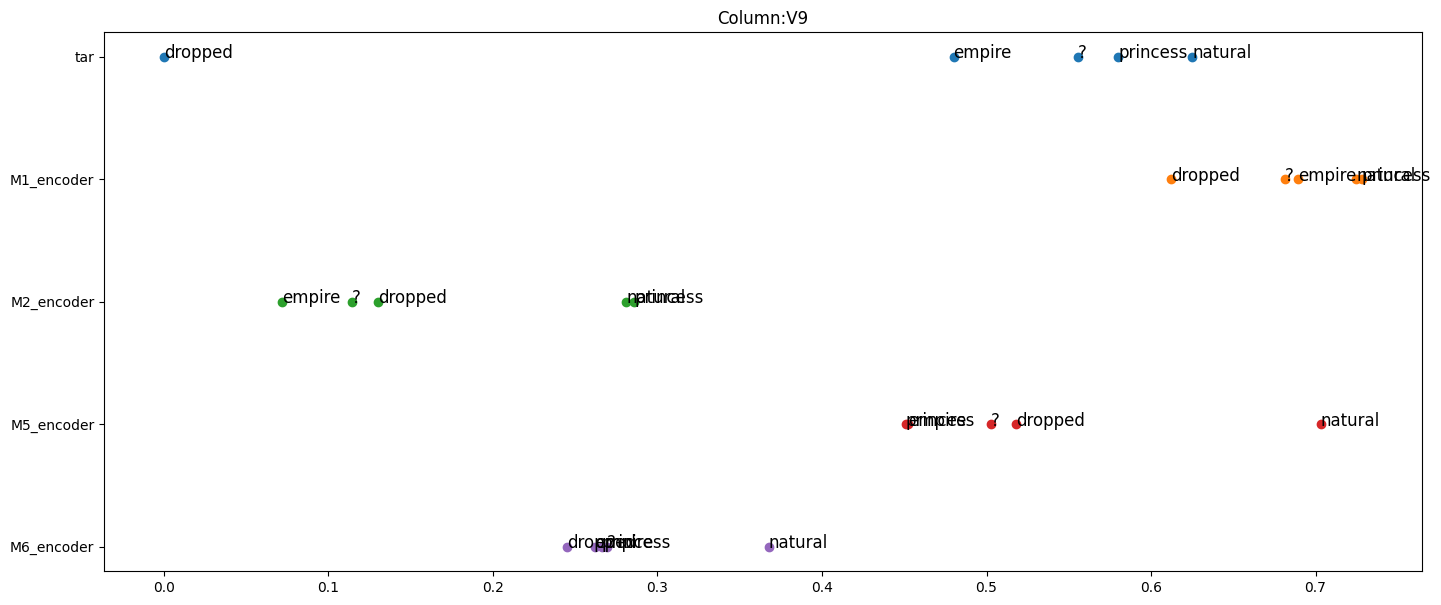

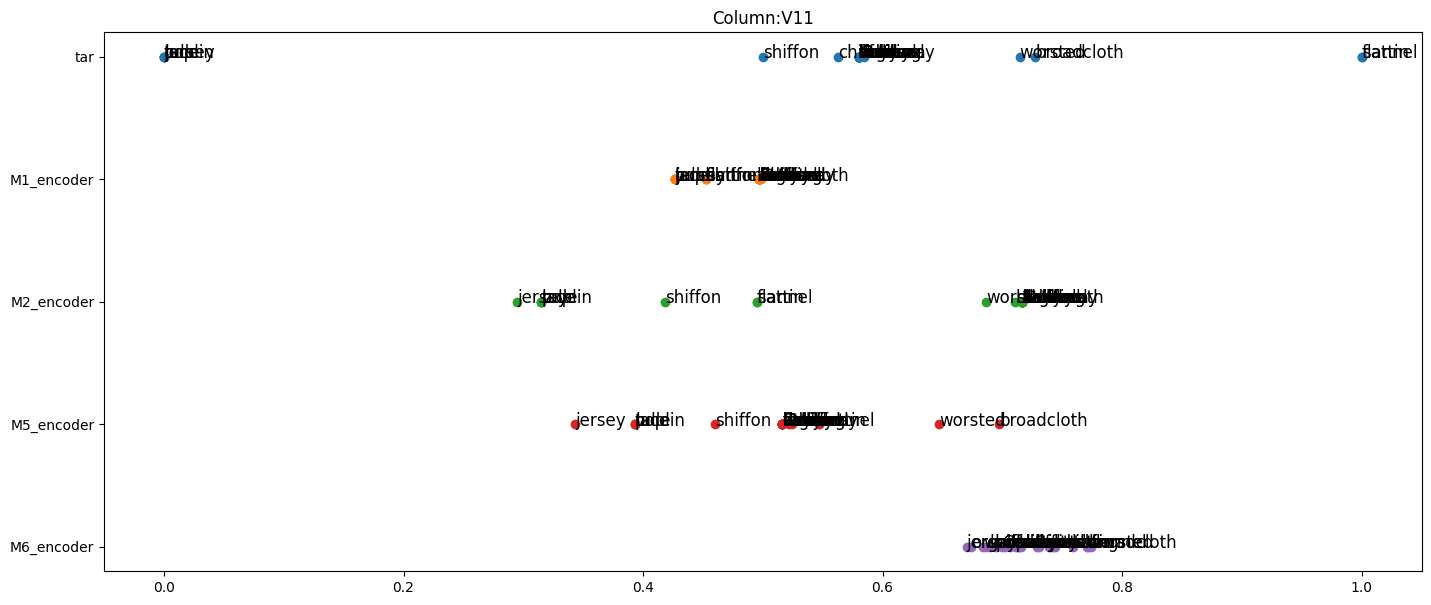

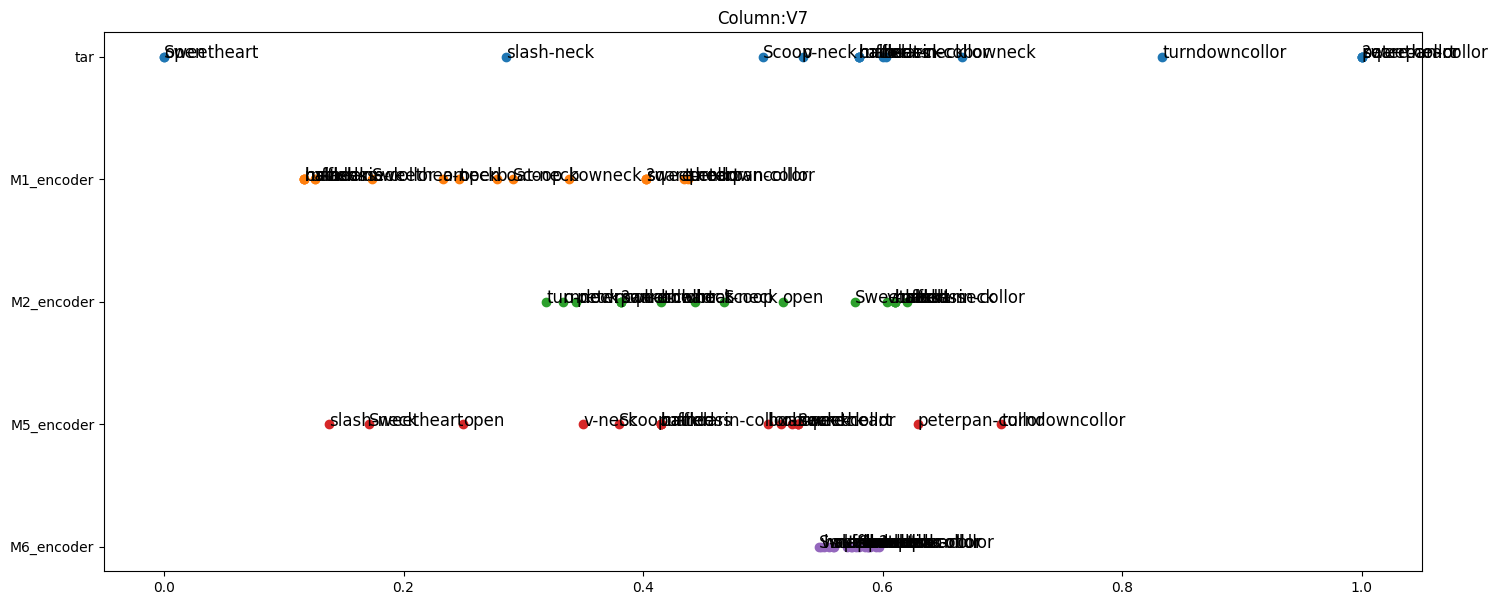

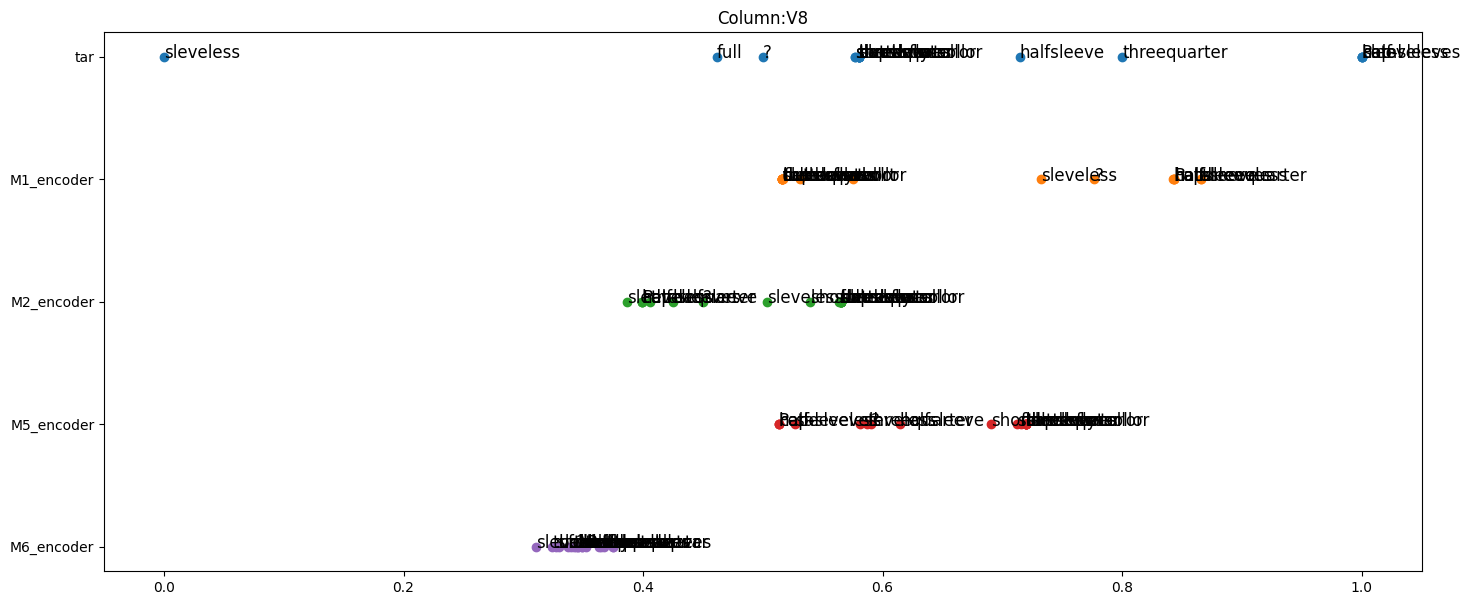

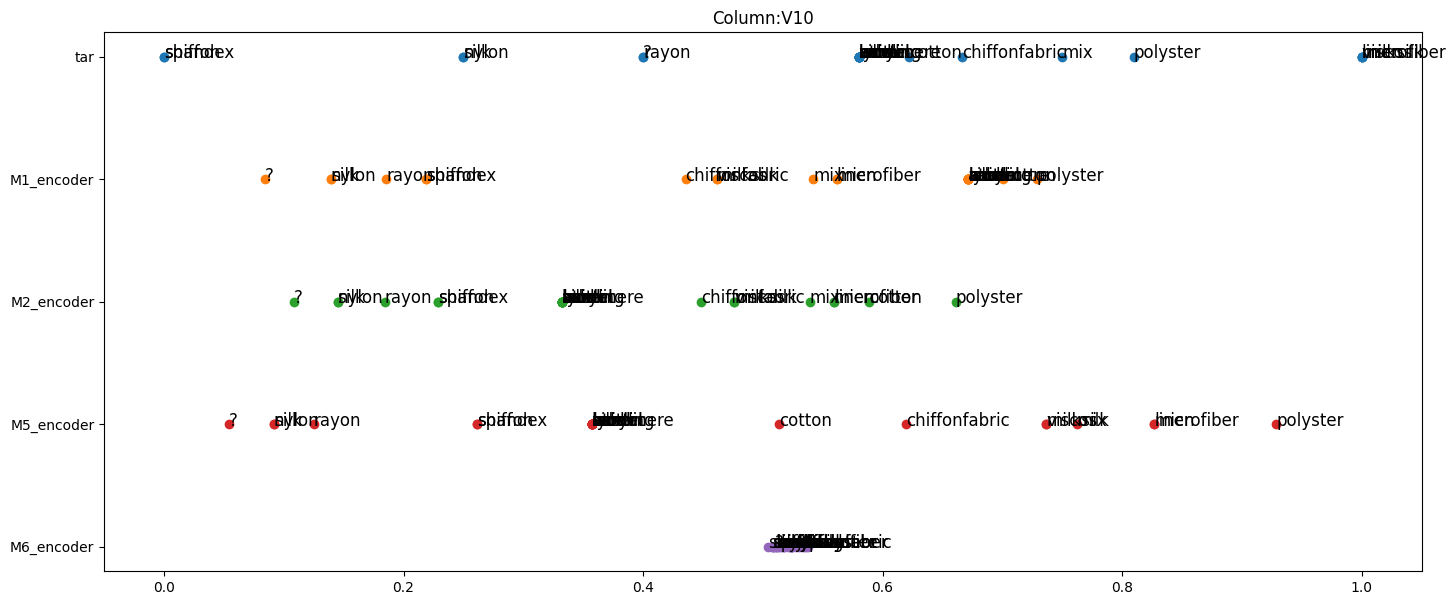

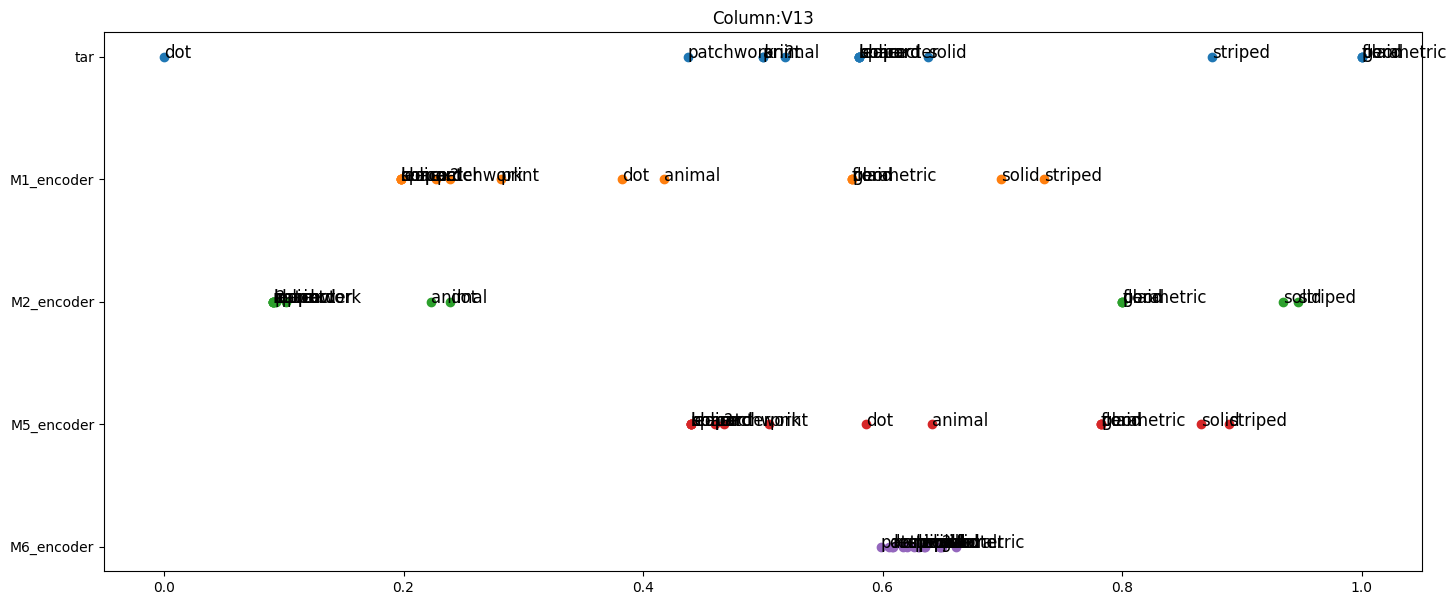

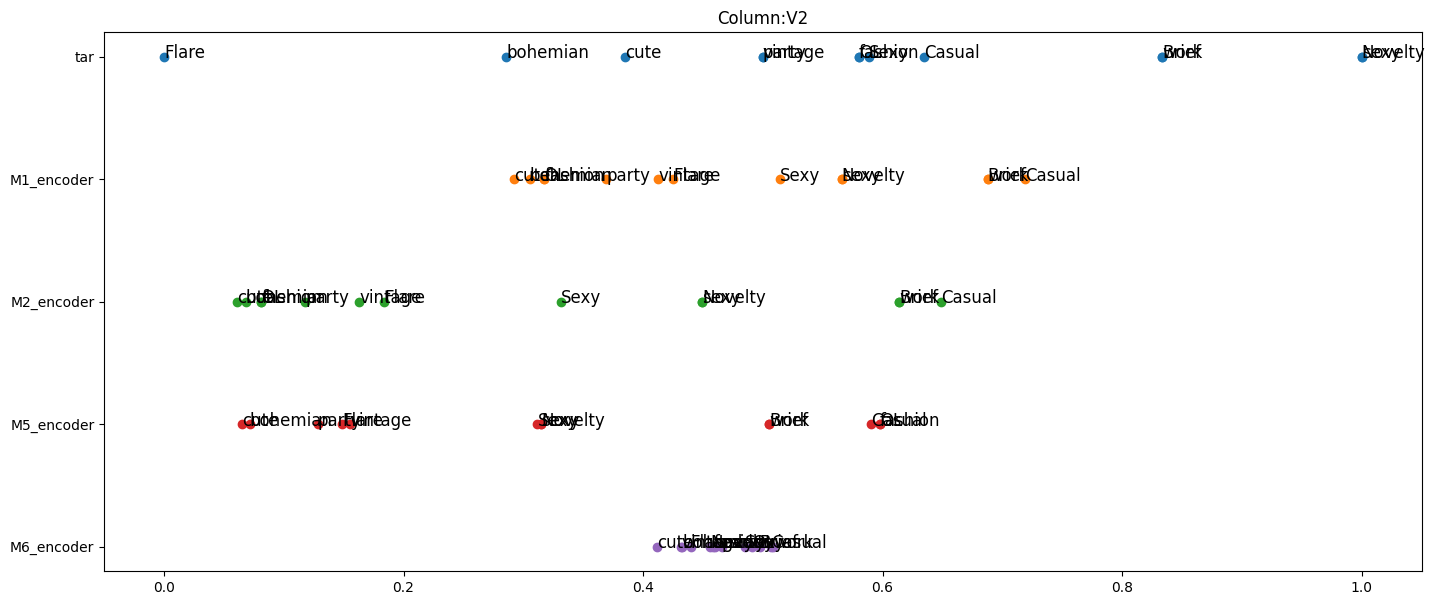

In [ ]:
encoders_considered = ['tar','M1_encoder','M2_encoder','M5_encoder','M6_encoder']
dictionary_datasets_encoded = {}
dictionary_datasets_encoded_values = {}


for cat in categorical_variables:
  which_column_dataset = list_datasets[cat]

  initialise_dataset = []
  initialise_dataset_values = []

  plt.figure(figsize=(17,7))


  for which in range(len(encoders_considered)):

    categories_in_col = which_column_dataset['cat'].values
    encoded_values = which_column_dataset[encoders_considered[which]].values

    sort = np.argsort(encoded_values)
    sorted_encoded = np.array(encoded_values[sort])
    sorted_cat = np.array(categories_in_col[sort])

    some_zeros = np.zeros((len(categories_in_col),))

    plt.scatter(sorted_encoded, some_zeros+ len(encoders_considered) - 1 - which)

    for i in range(len(sorted_encoded)):
      plt.text(sorted_encoded[i], len(encoders_considered) - 1 - which - 0.01, sorted_cat[i],size = 'large')

    initialise_dataset.append(sorted_cat)
    initialise_dataset_values.append(sorted_encoded)



  dictionary_datasets_encoded[cat] = initialise_dataset
  dictionary_datasets_encoded_values[cat] = initialise_dataset_values

  plt.title('Column:'+cat)
  plt.yticks(np.arange(0,len(encoders_considered)), labels = encoders_considered[::-1])
  plt.show()



In [ ]:
pd.DataFrame(dictionary_datasets_encoded['V5'])

,0,1,2,3,4,5,6
0,XL,L,M,free,S,small,s
1,free,M,L,XL,S,small,s
2,S,small,s,XL,L,free,M
3,XL,small,s,S,free,L,M
4,M,L,XL,free,small,S,s


In [ ]:
dictionary_datasets_encoded_values['V5']

[array([0.        , 0.5       , 0.55813953, 0.58      , 0.75      ,
        1.        , 1.        ]),
 array([0.18285917, 0.18505429, 0.23203652, 0.29494819, 0.31795025,
        0.32579893, 0.32579893]),
 array([0.35556731, 0.39751992, 0.39751992, 0.56953496, 0.73936611,
        0.75628752, 0.75824064]),
 array([0.73401022, 0.74599731, 0.74599731, 0.75780696, 0.82562119,
        0.82989472, 0.83565766]),
 array([0.62232703, 0.62692195, 0.62982684, 0.63709295, 0.63761073,
        0.64234692, 0.64280027])]

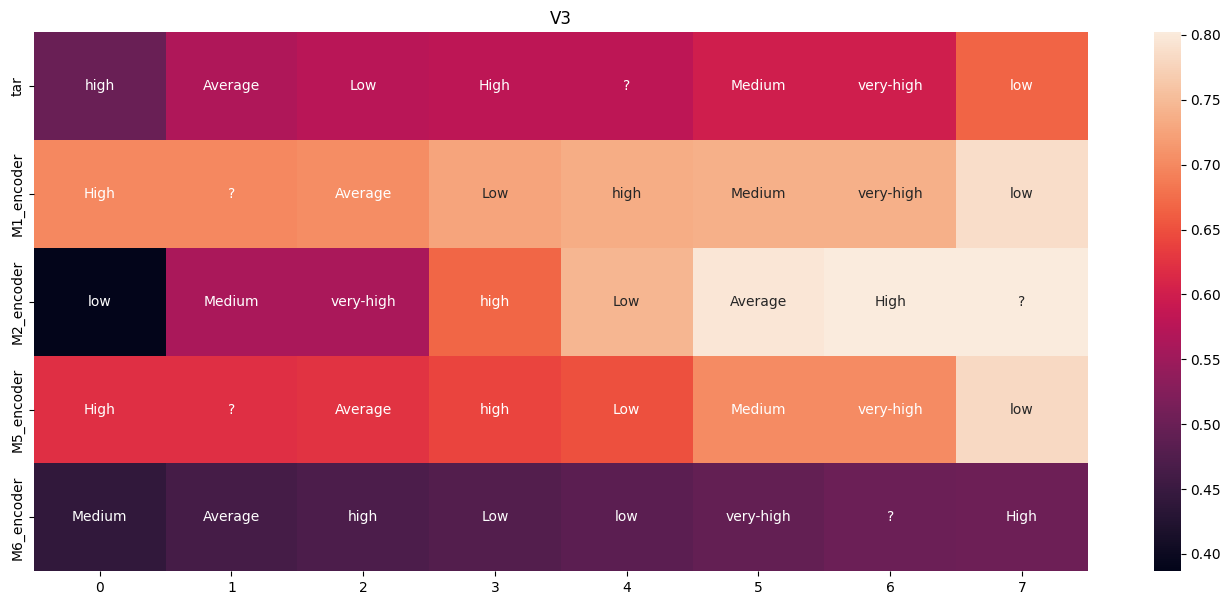

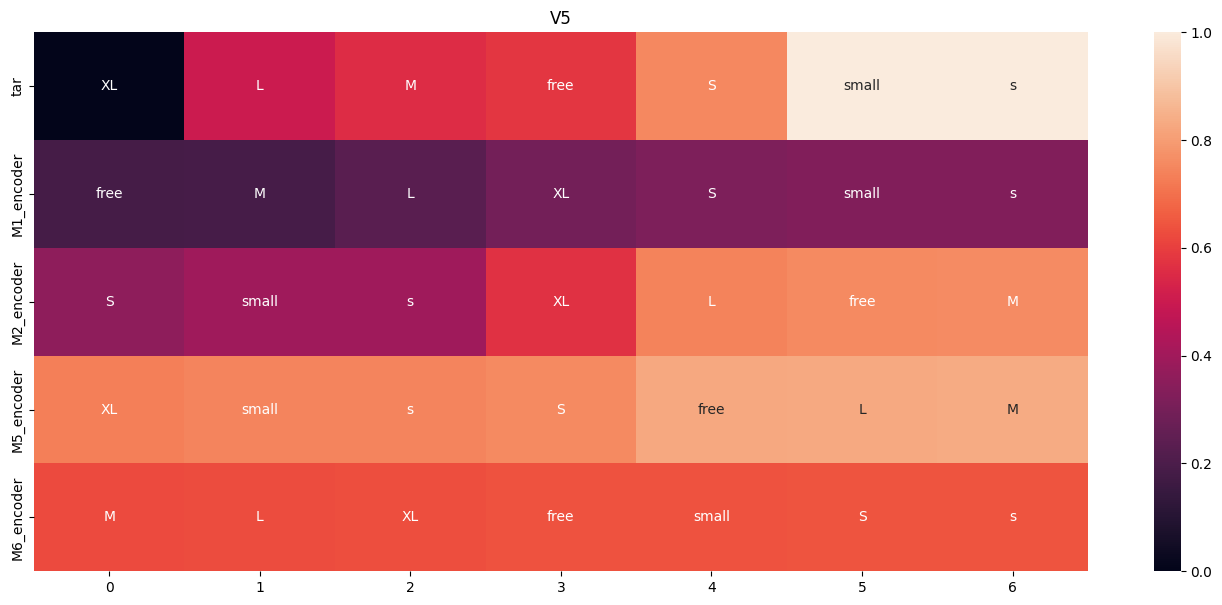

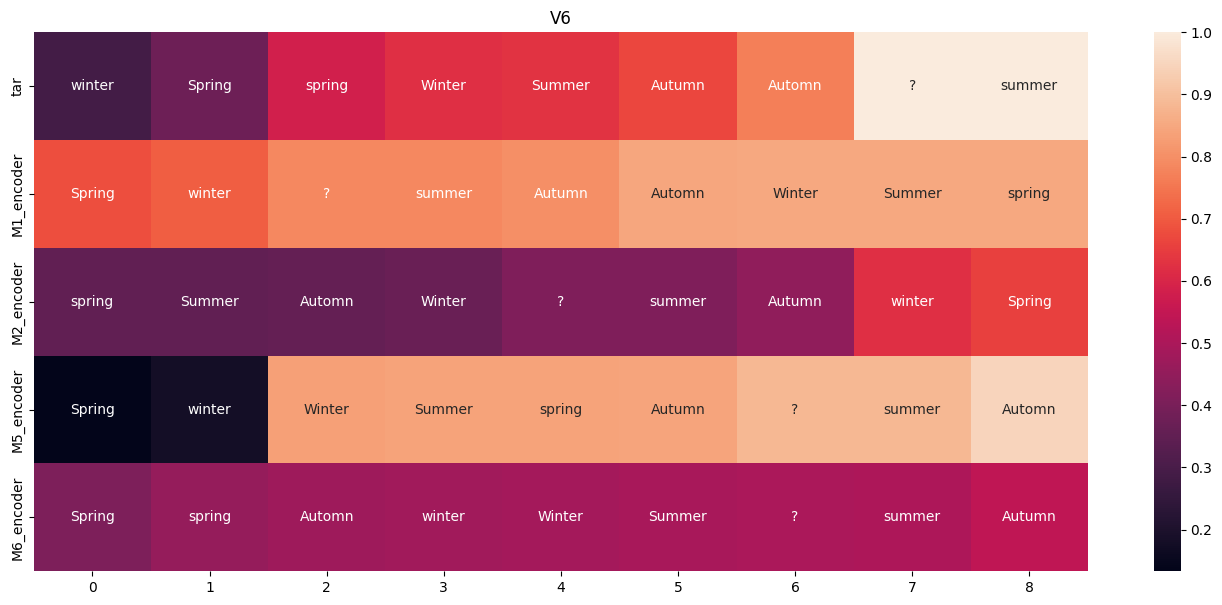

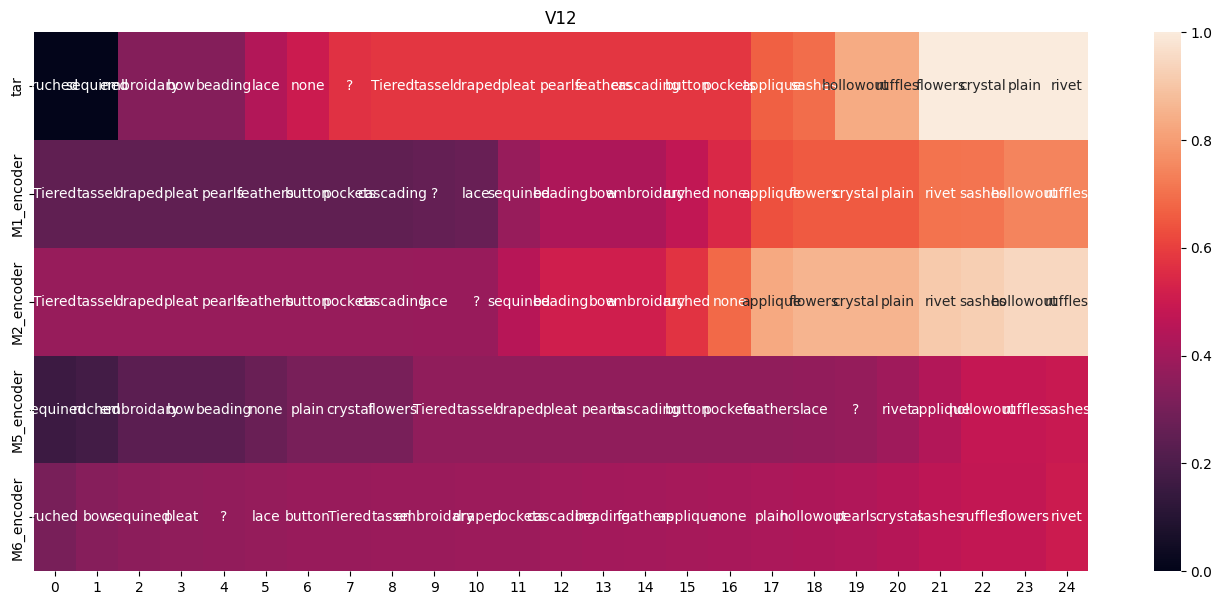

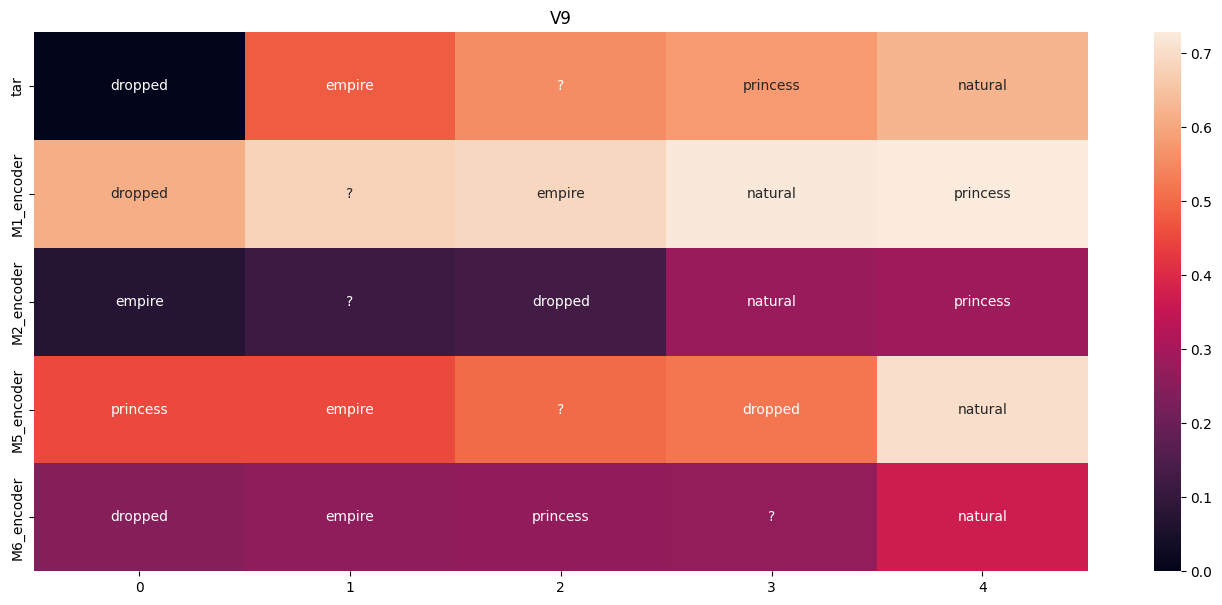

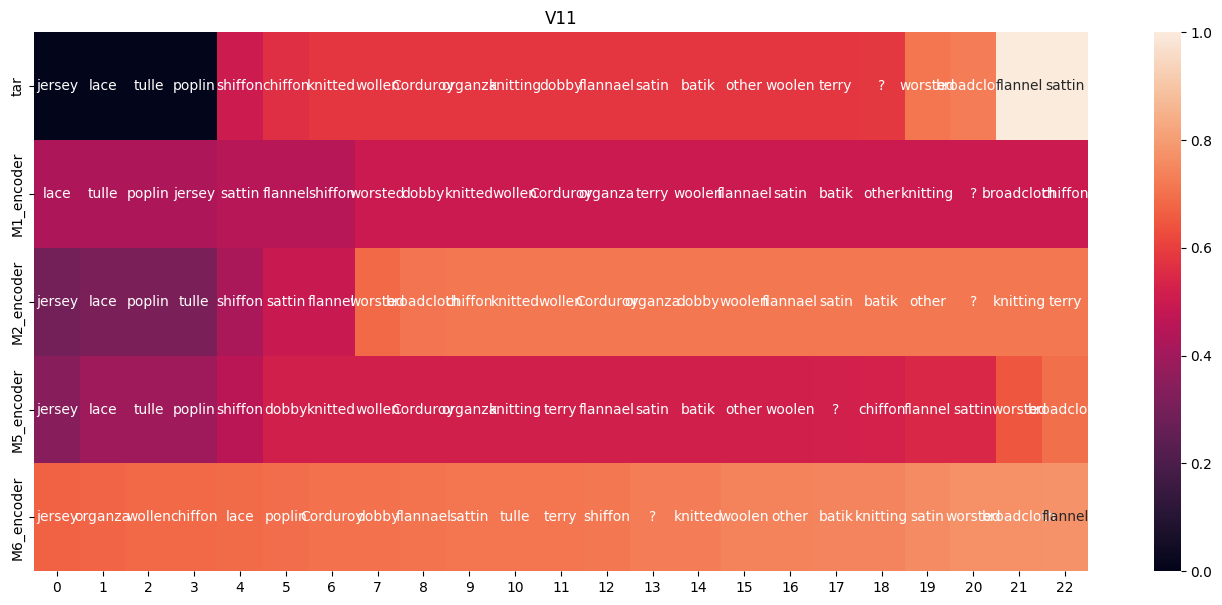

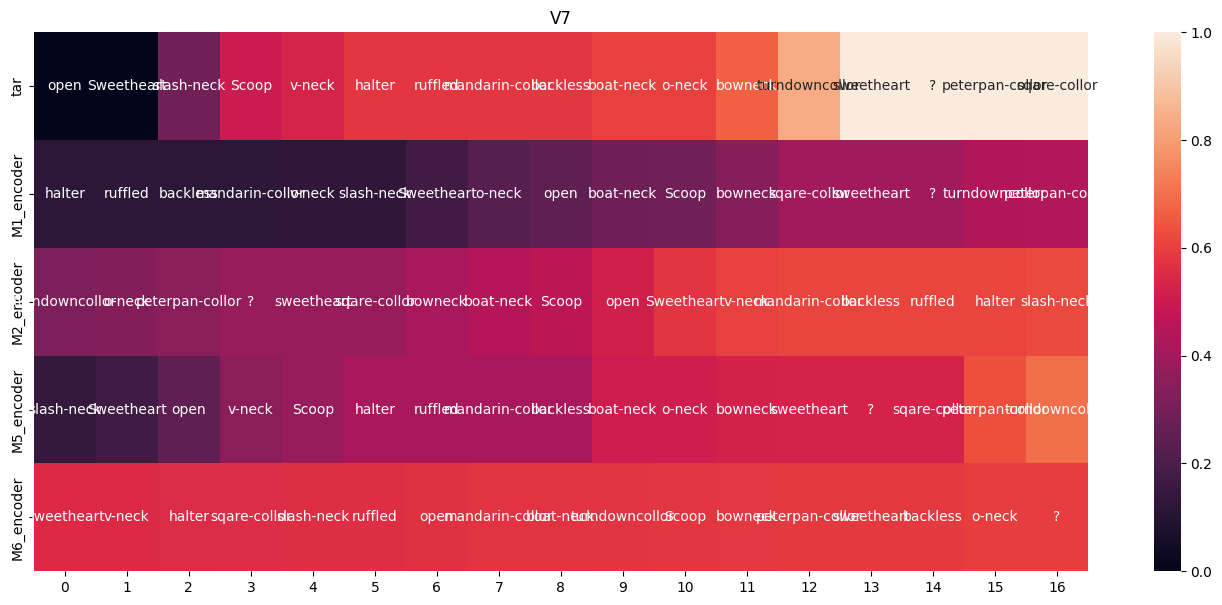

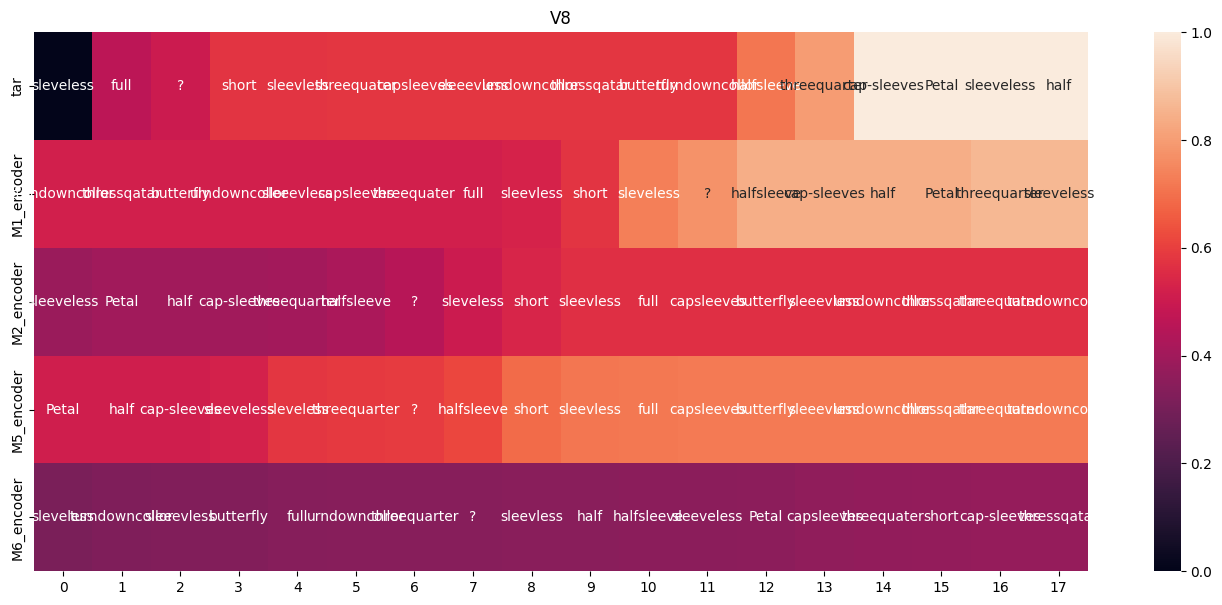

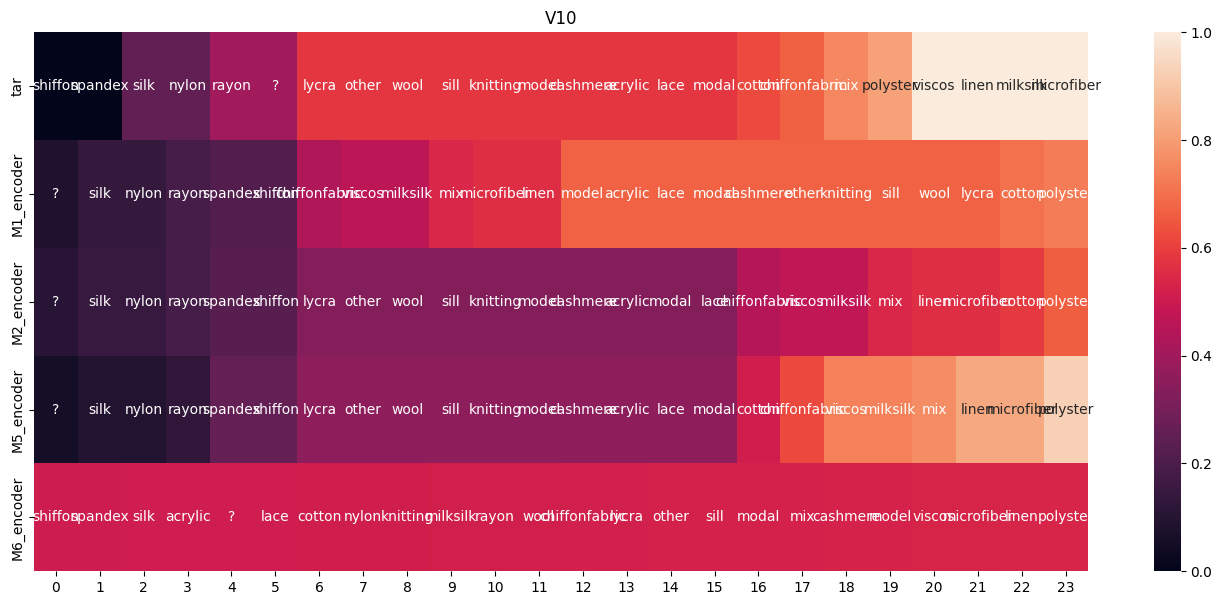

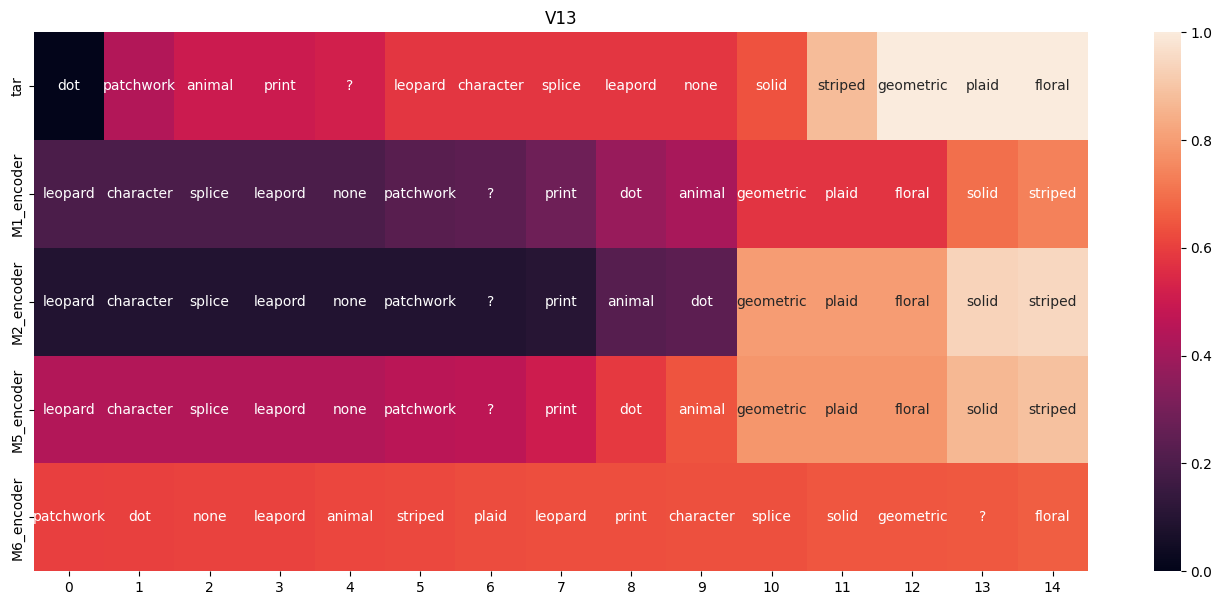

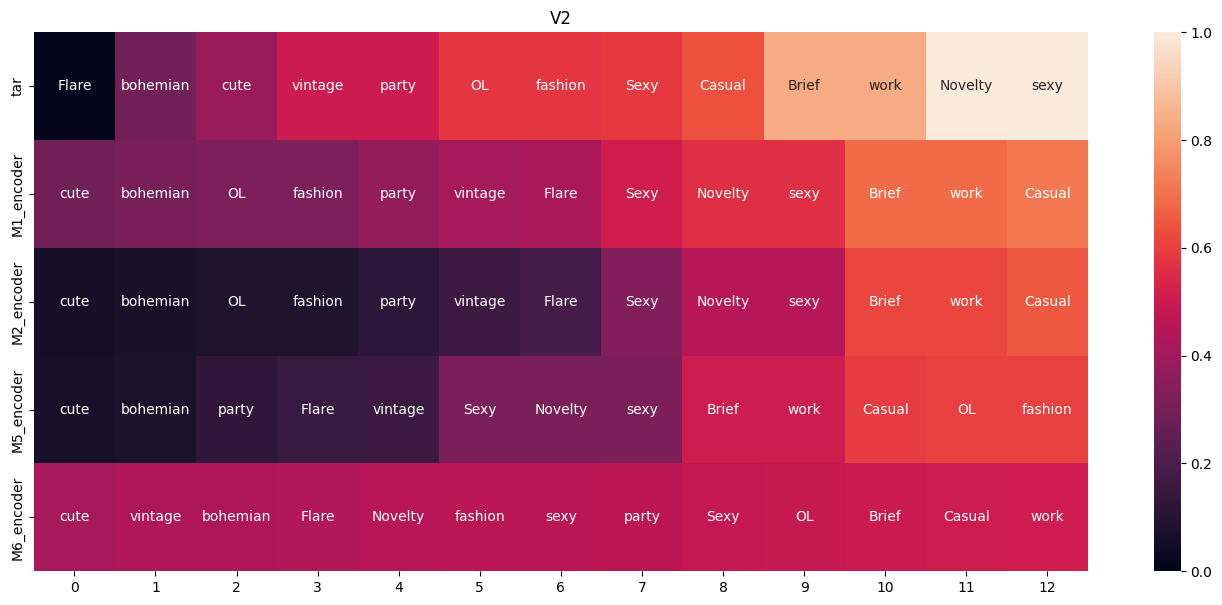

In [ ]:
for cat in categorical_variables:
  plt.figure(figsize = (17,7))
  sns.heatmap(dictionary_datasets_encoded_values[cat], annot=pd.DataFrame(dictionary_datasets_encoded[cat]), fmt = '', cmap=None,  yticklabels=encoders_considered)
  plt.title(cat)
  plt.show()